In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display all the data columns
pd.pandas.set_option('display.max_columns',None)
#import warnings 
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# In Data Analytics, we will analyze the below stuff :-

1. Missing Values
2. All the numeric variables
3. Distributon of  Numeric variables
4. Categorical Variables
5. Correlation
6. Relationship between dependent and independent variables
7. Outlier

In [4]:
df.shape

(1460, 81)

In [5]:
# 1. Missing values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()!=0]
feature_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
df['LotFrontage'].isnull().sum()/len(df['LotFrontage']) # 17 percentage is missing

0.1773972602739726

In [8]:
for missing_feature in feature_with_na:
    print(missing_feature,np.round(df[missing_feature].isnull().sum()/len(df[missing_feature])*100,4) ," % missing value")

# not gonna drop now , doing EDA only

LotFrontage 17.7397  % missing value
Alley 93.7671  % missing value
MasVnrType 59.726  % missing value
MasVnrArea 0.5479  % missing value
BsmtQual 2.5342  % missing value
BsmtCond 2.5342  % missing value
BsmtExposure 2.6027  % missing value
BsmtFinType1 2.5342  % missing value
BsmtFinType2 2.6027  % missing value
Electrical 0.0685  % missing value
FireplaceQu 47.2603  % missing value
GarageType 5.5479  % missing value
GarageYrBlt 5.5479  % missing value
GarageFinish 5.5479  % missing value
GarageQual 5.5479  % missing value
GarageCond 5.5479  % missing value
PoolQC 99.5205  % missing value
Fence 80.7534  % missing value
MiscFeature 96.3014  % missing value


In [9]:
import os
print(os.getcwd())

C:\Users\Admin\Desktop\Ml_practice\EDA


<Axes: >

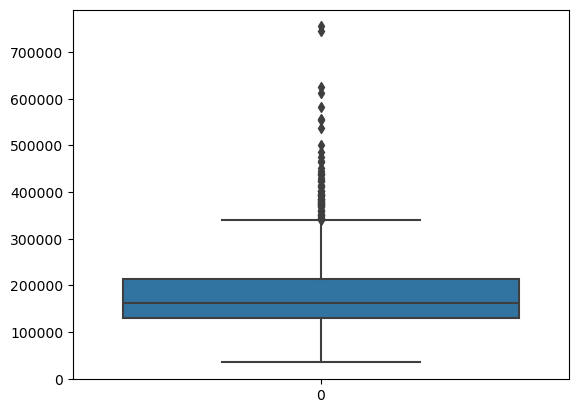

In [10]:
sns.boxplot(df['SalePrice'])

In [11]:
data=df.copy()

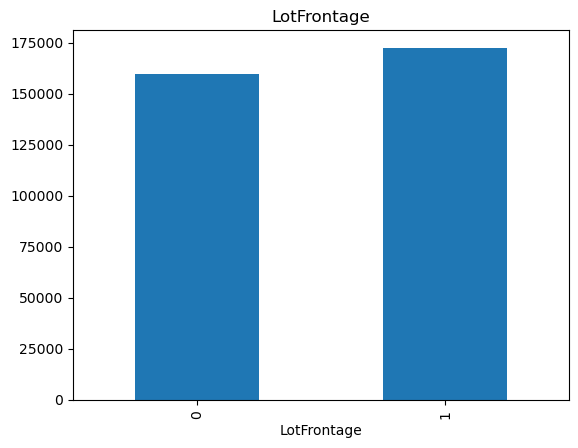

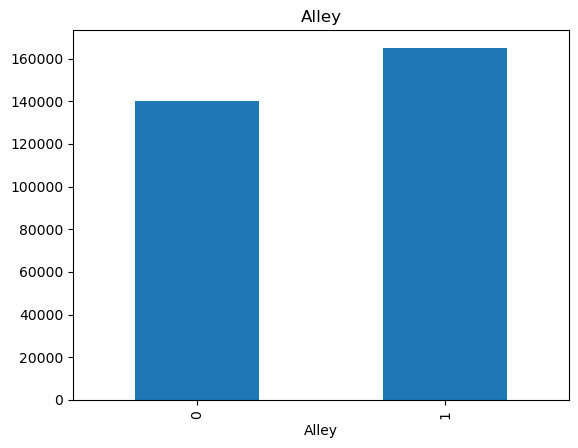

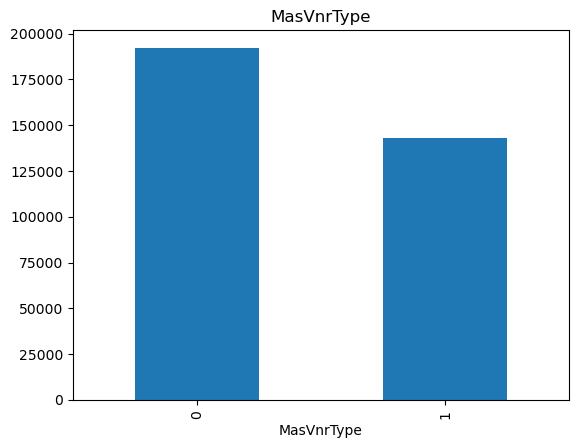

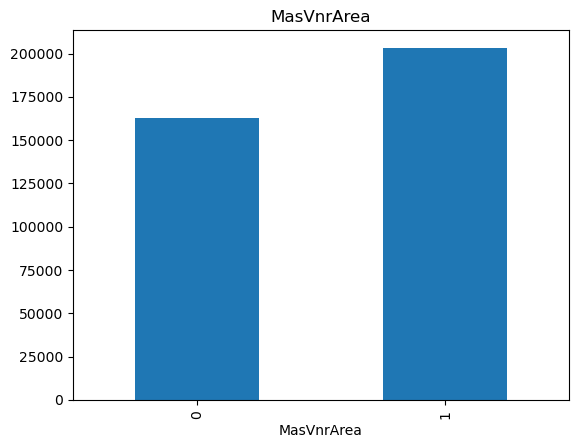

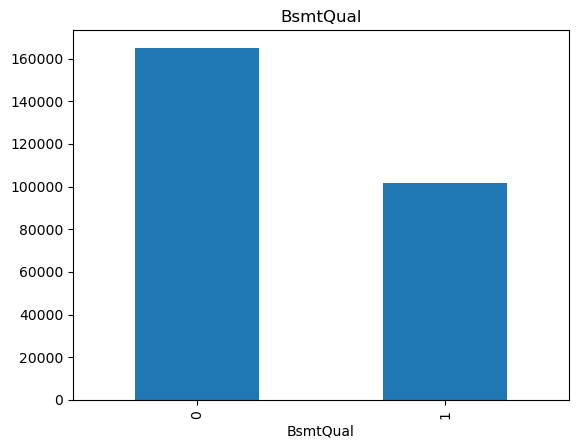

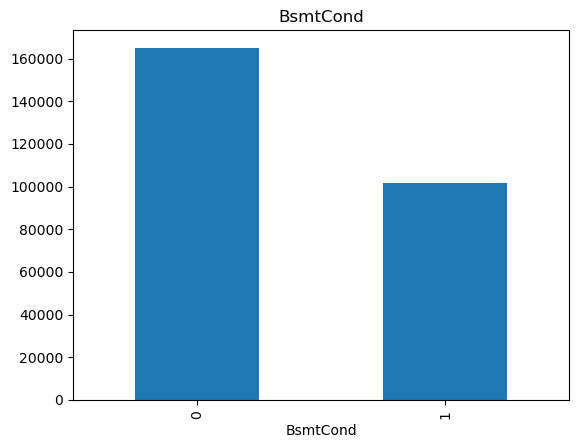

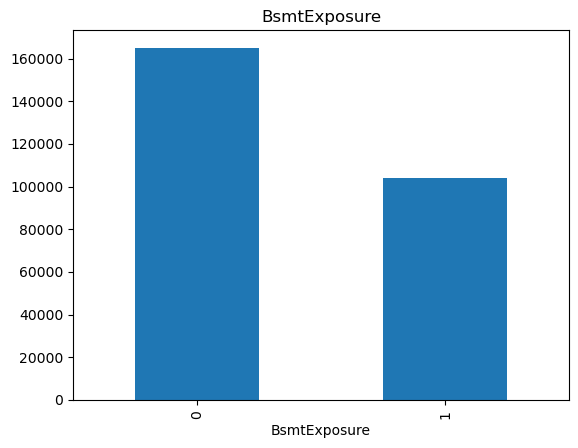

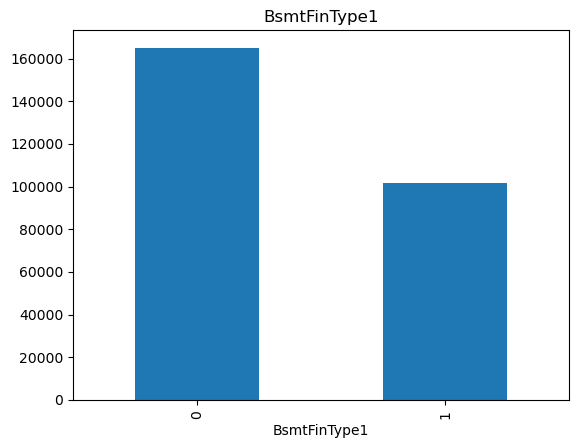

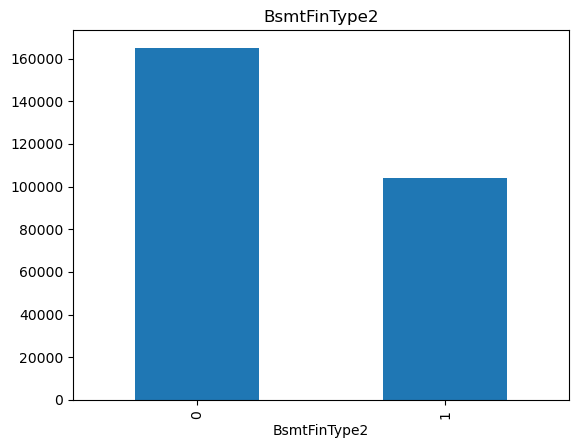

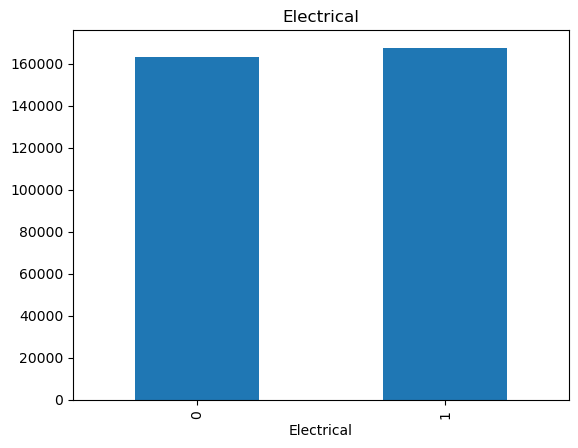

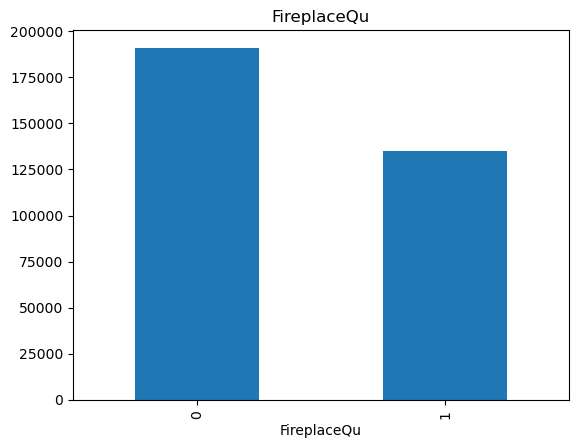

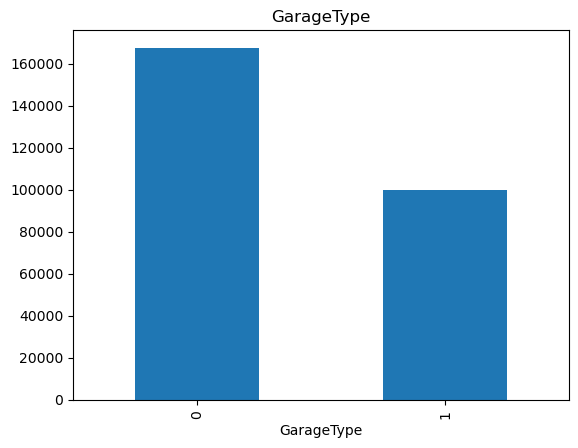

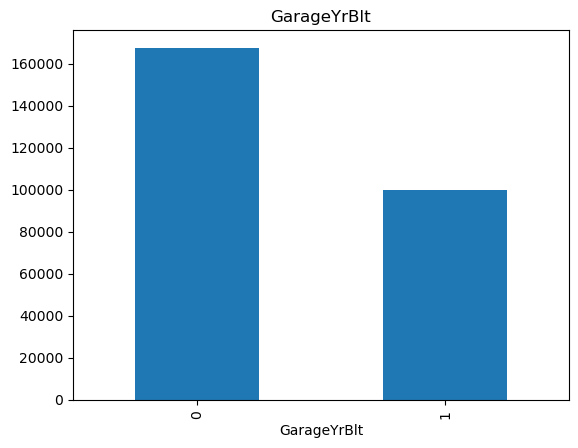

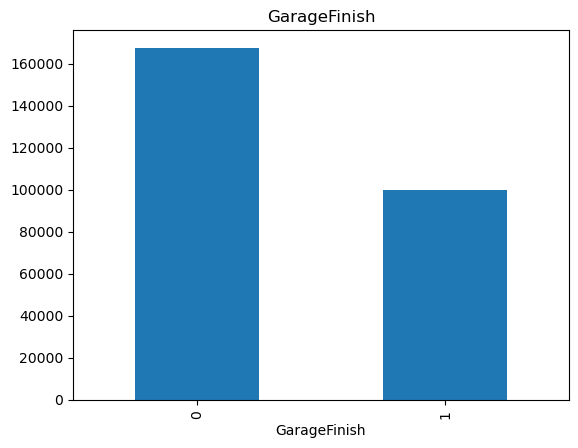

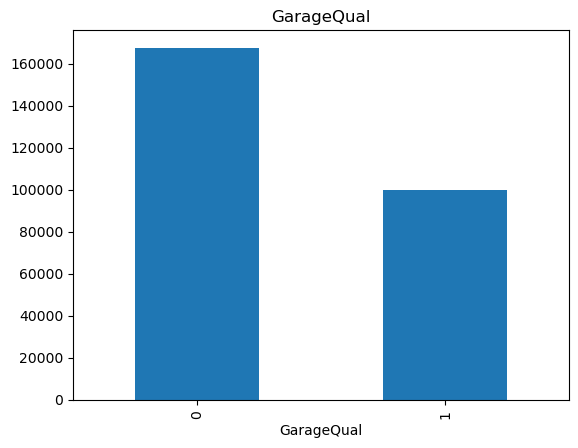

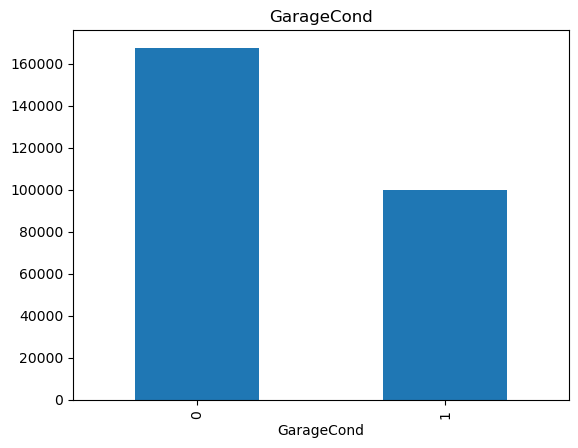

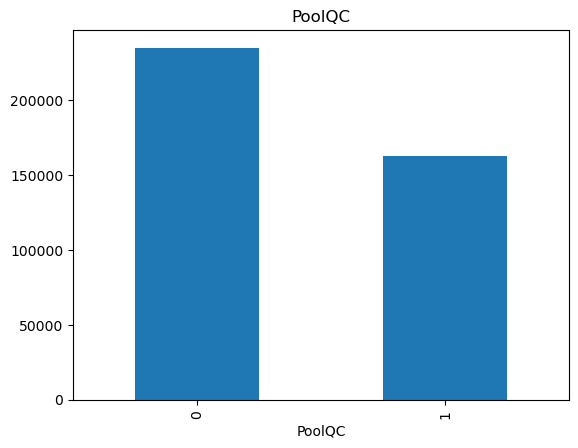

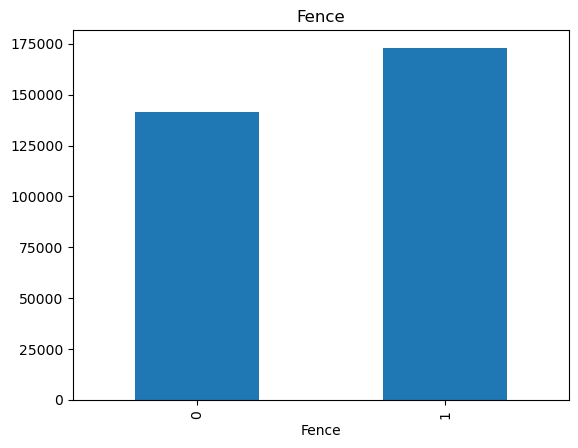

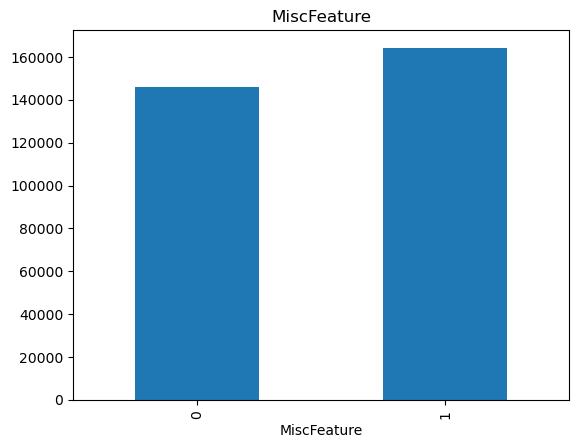

In [12]:
for feature in feature_with_na:
    # we are gonna change missing value to 1 and non missing to 0
    data[feature] = np.where(data[feature].isnull(),1,0)

    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

# Here we can see that there is relation with missing value which we will do in Feature Engineer


# Numerical Feature

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# getting all numerical data

In [17]:
df['MSSubClass'].dtype!='O'

True

In [18]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype!='O']

In [19]:
numerical_feature

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [20]:
len(numerical_feature)

38

In [21]:
df[numerical_feature].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

# Temporal variable -> related  to time

In [23]:
temporal_var = [feature for feature in numerical_feature if 'yr' in feature.lower() or 'year' in feature.lower()]

In [24]:
temporal_var

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [25]:
for year_feature in temporal_var:
    print(year_feature,df[year_feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House price vs Year Sold')

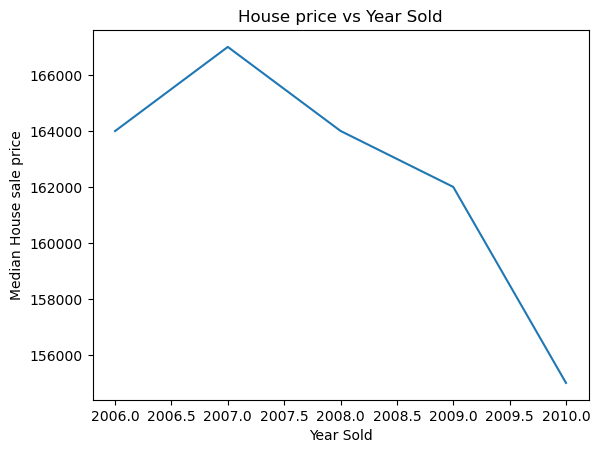

In [26]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House sale price')
plt.title('House price vs Year Sold')

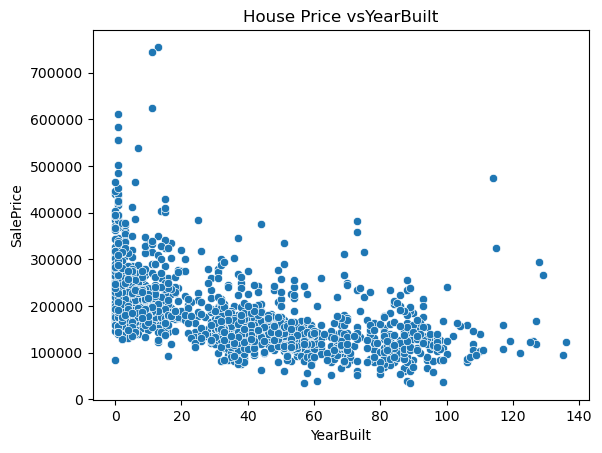

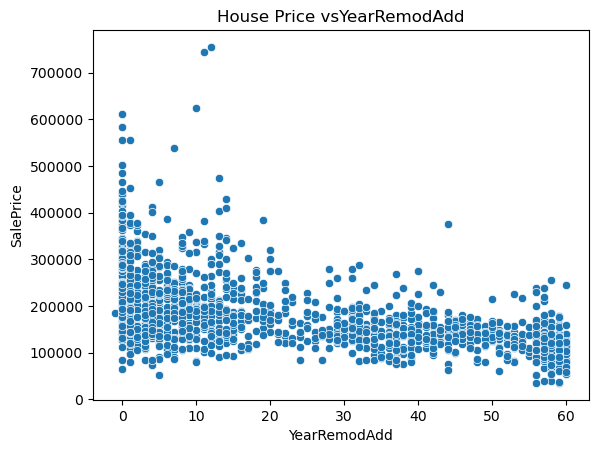

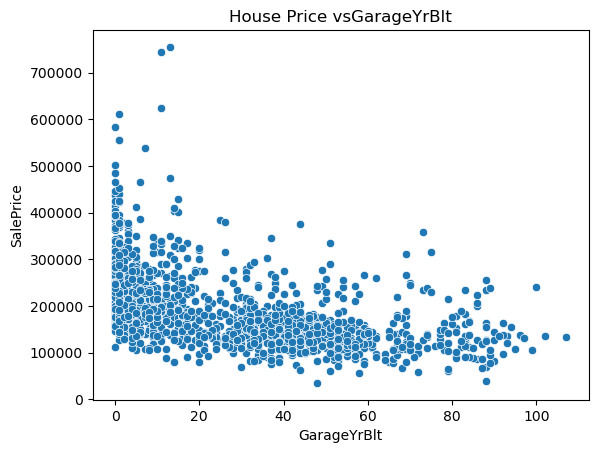

In [27]:
for time_feature in temporal_var:
    if time_feature != 'YrSold':
        df[time_feature] = df['YrSold'] - df[time_feature]
        sns.scatterplot(df,x=time_feature,y='SalePrice')
        plt.title('House Price vs'+ time_feature)
        plt.show()

In [28]:
# Numerical variable
# continuous and discrete

In [29]:
discrete_features = [feature for feature in numerical_feature if len(df[feature].unique())<=25]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [30]:
df[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  YrSold  
0           0           2          0         0        0       2    2008  
1           1           2          0         0        0       5    2007  
2           1           2          0         0        0       9    2008  
3           1           3          0         0        0       2    2006  
4           1           3          0         0        0      12    2008

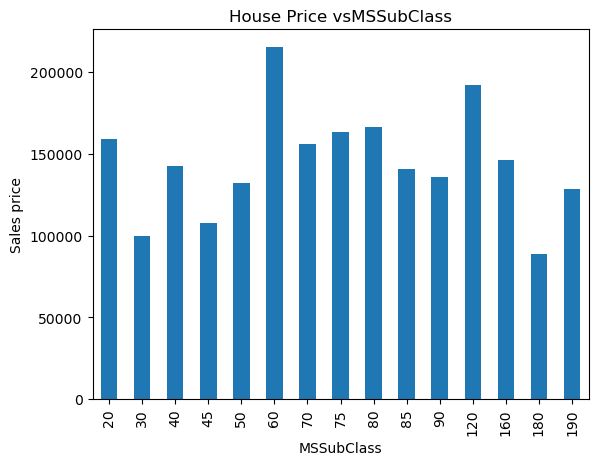

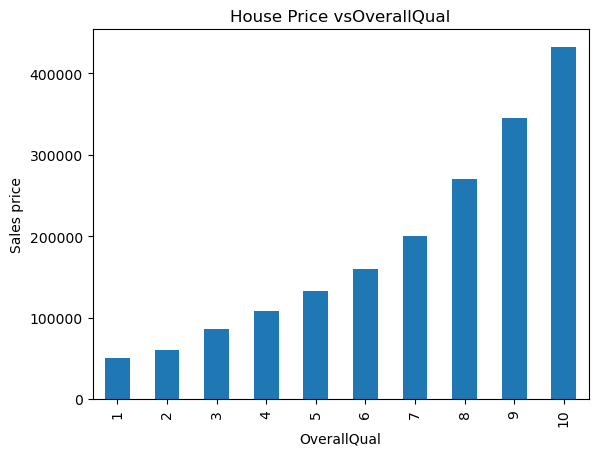

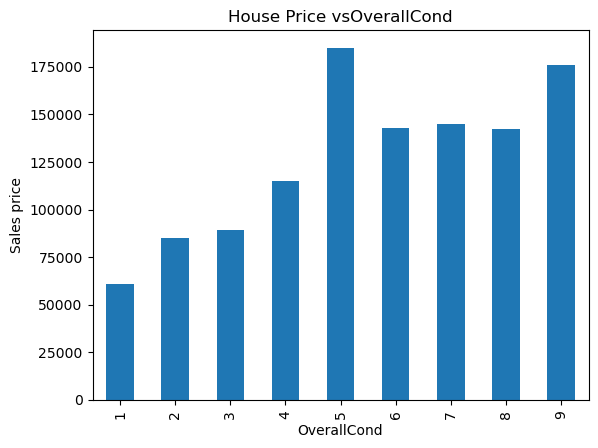

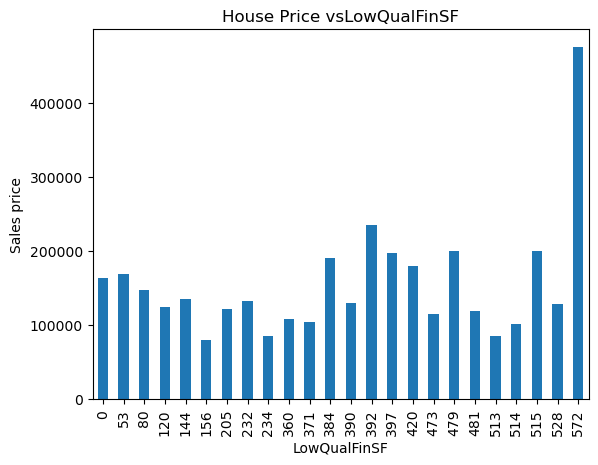

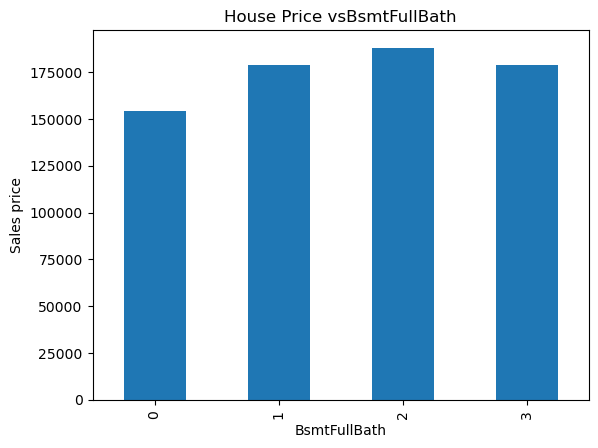

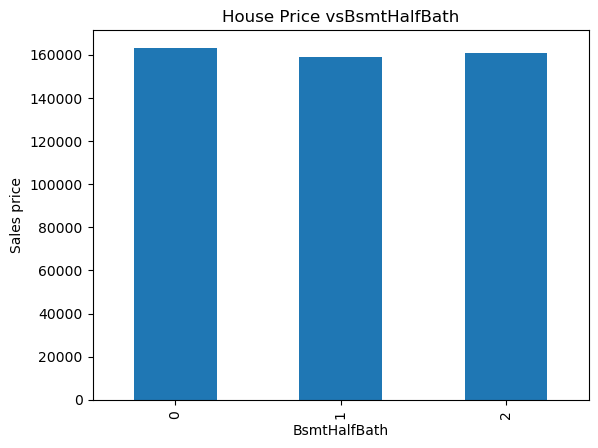

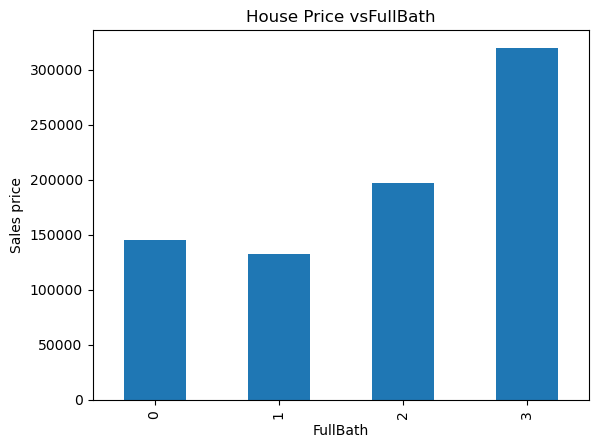

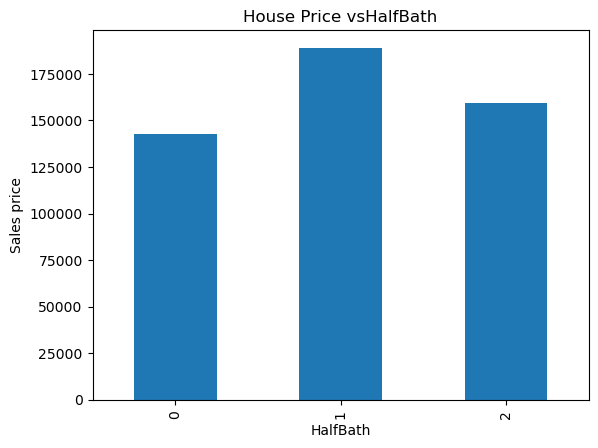

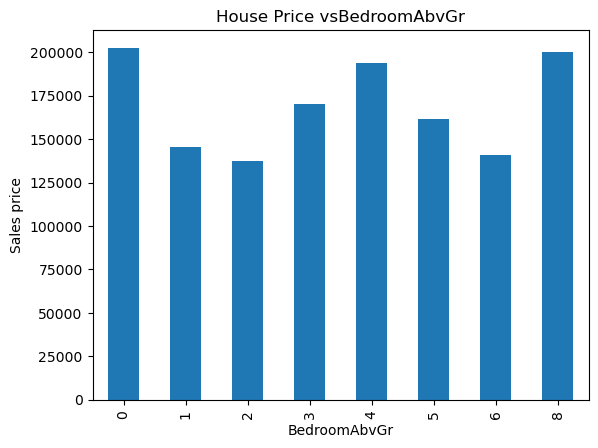

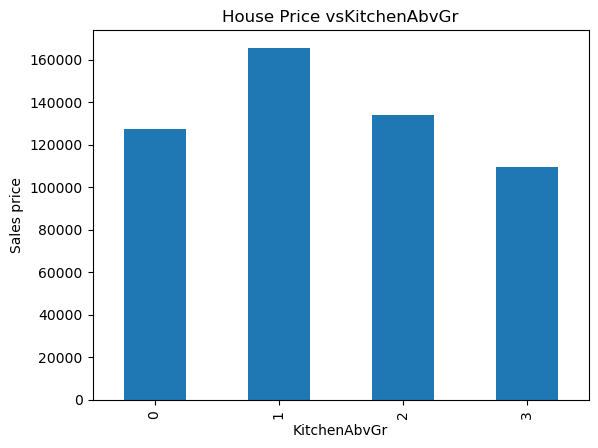

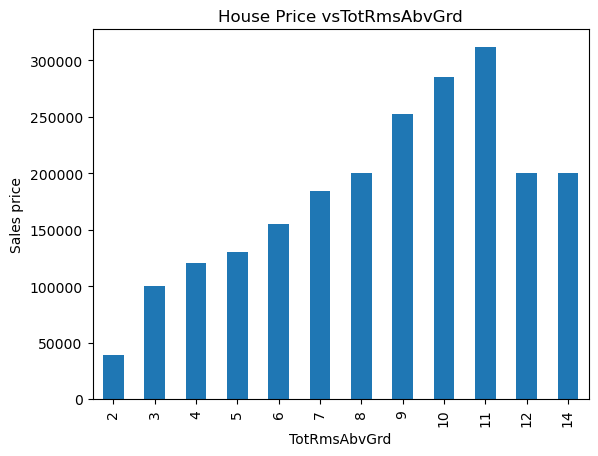

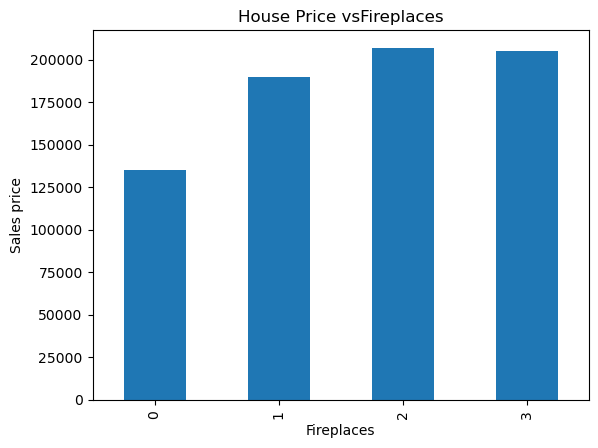

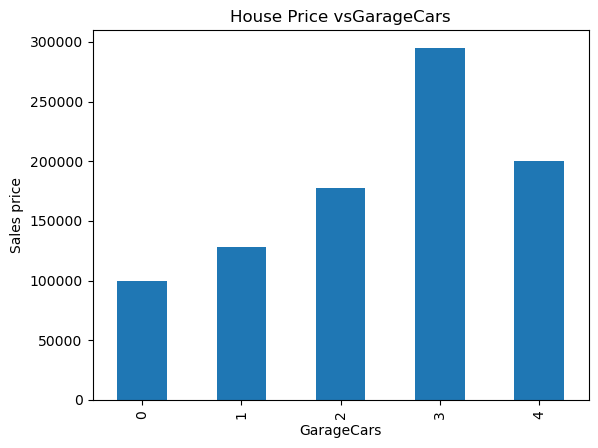

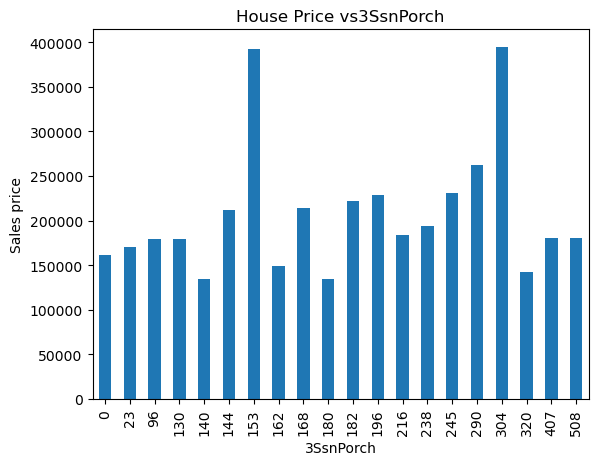

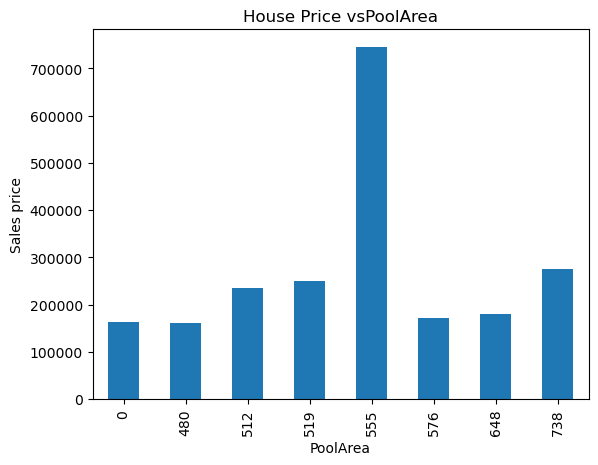

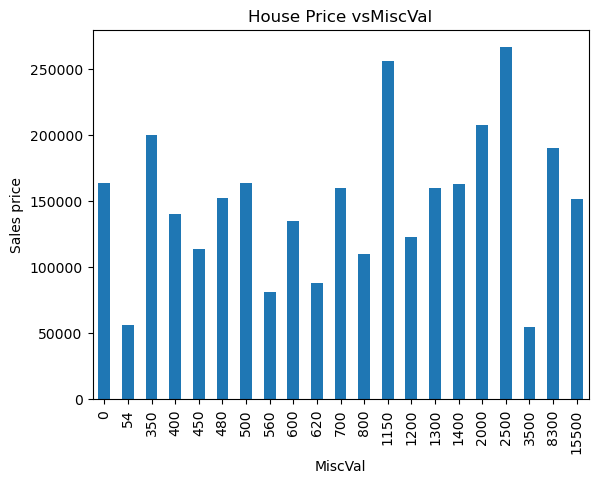

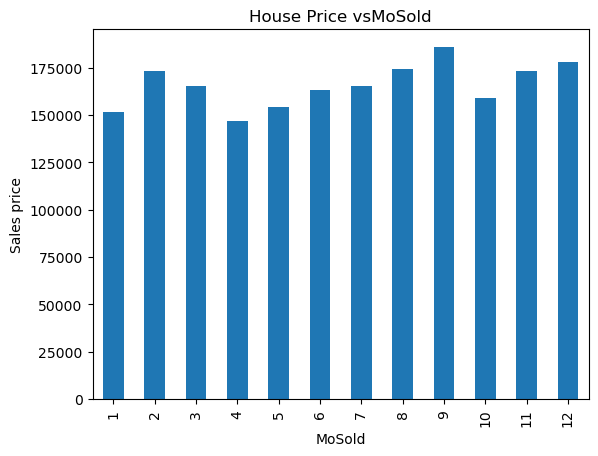

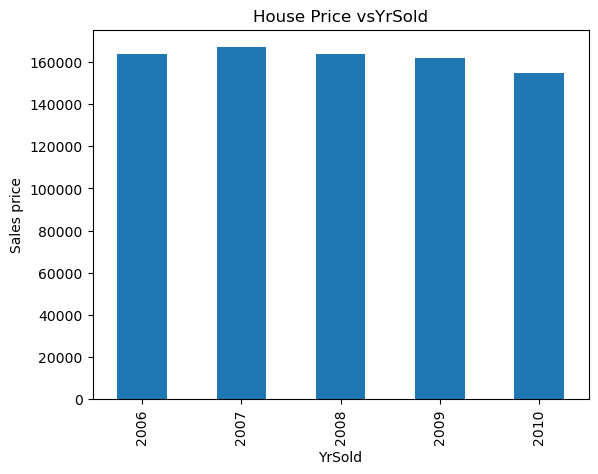

In [31]:
data = df.copy()
for discrete_feature in discrete_features:
    data.groupby(discrete_feature)["SalePrice"].median().plot(kind='bar')
    plt.xlabel(discrete_feature)
    plt.ylabel('Sales price')
    plt.title('House Price vs'+discrete_feature)
    plt.show()

In [32]:
# there is a relationship between discrete variable and house  price

In [33]:
continuous_features = [feature for feature in numerical_feature if feature not in discrete_features ]
continuous_features

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

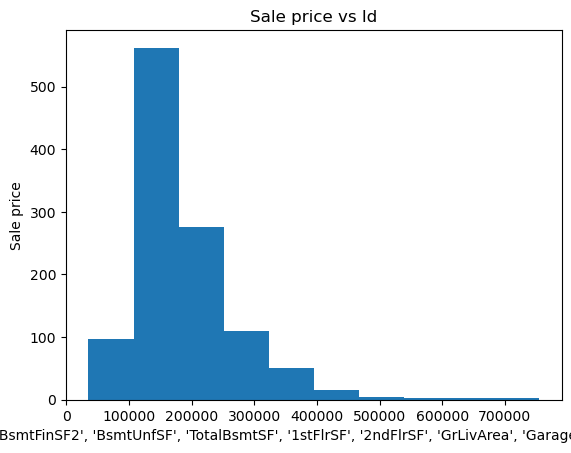

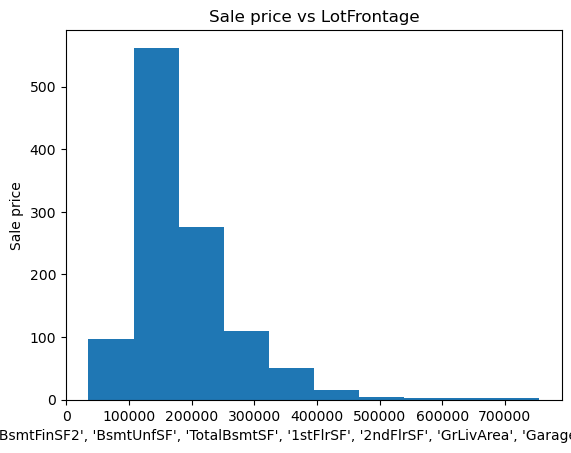

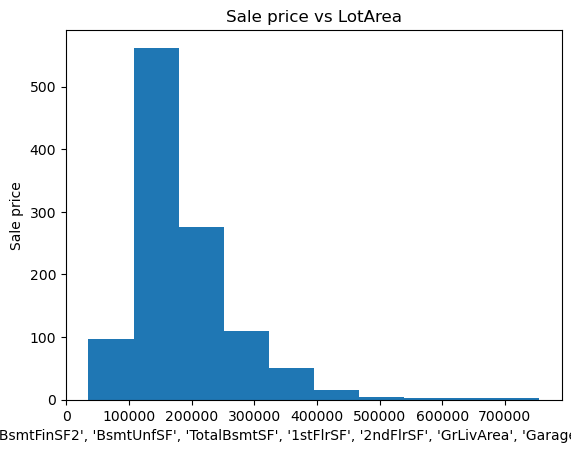

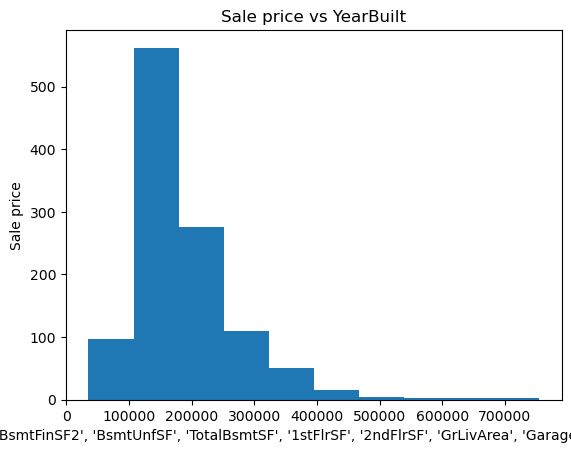

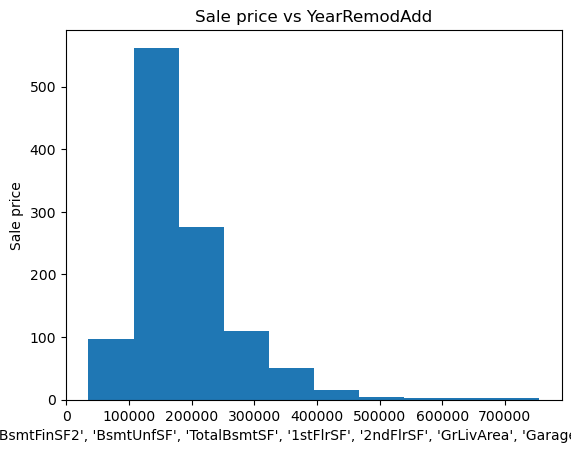

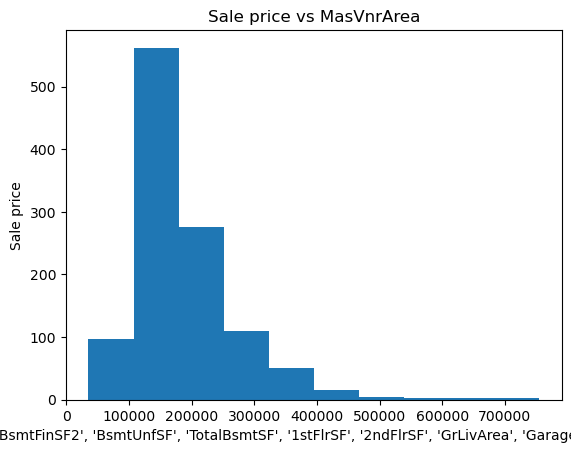

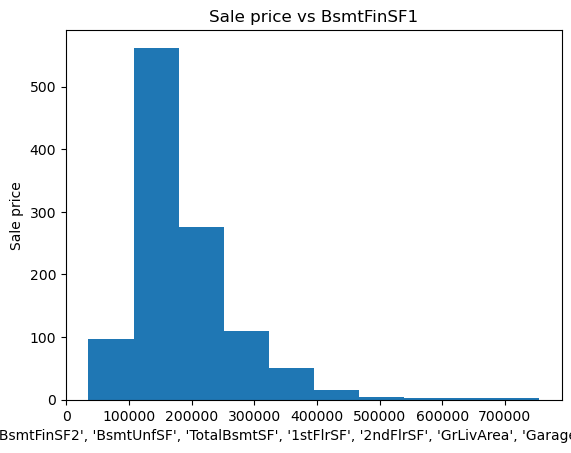

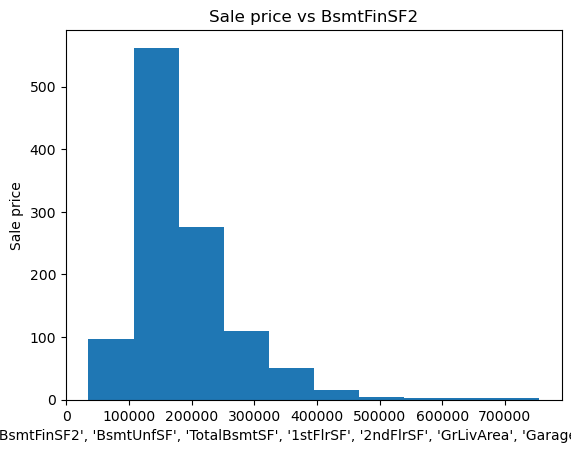

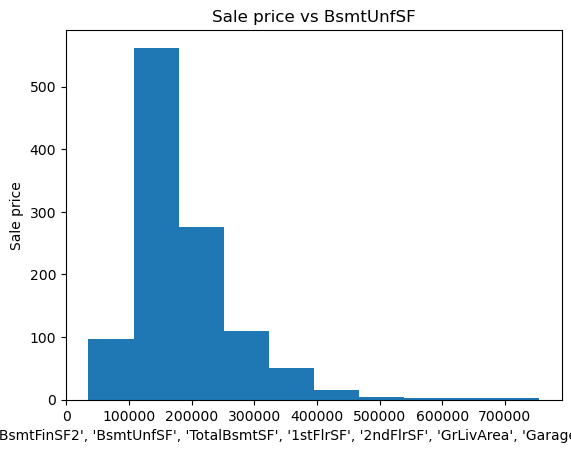

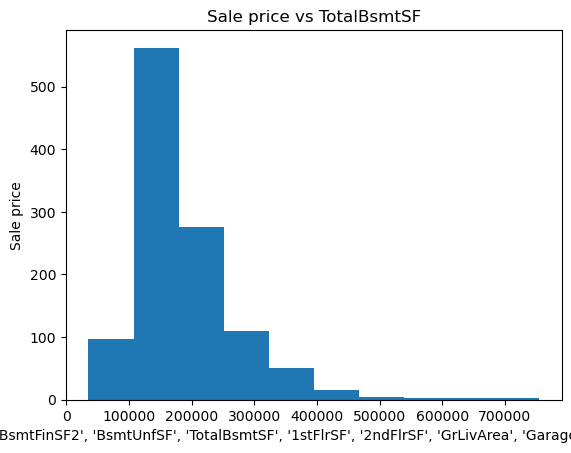

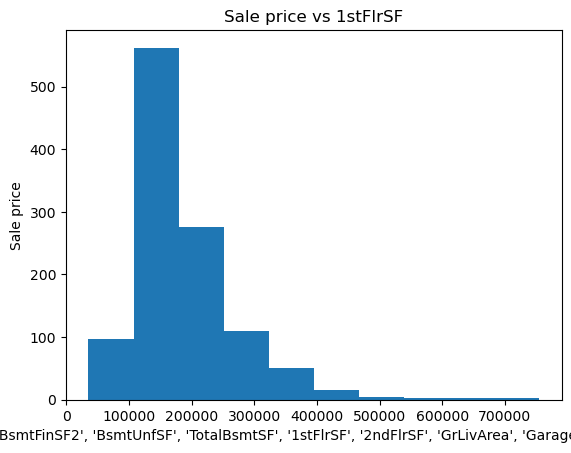

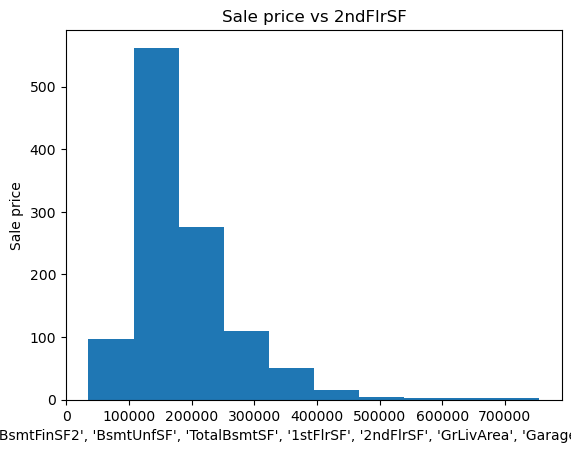

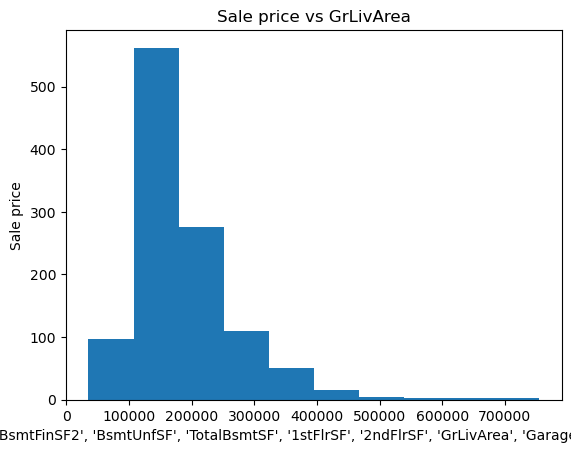

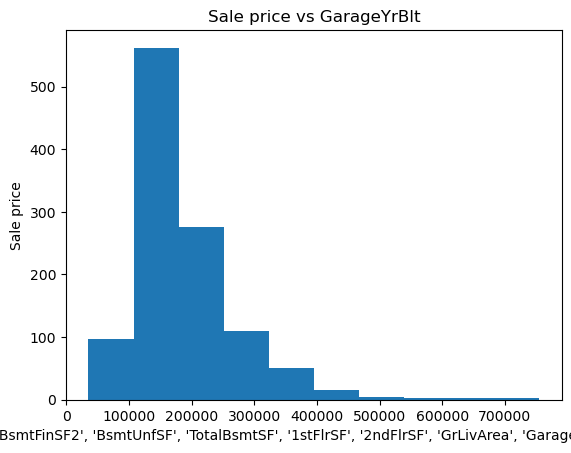

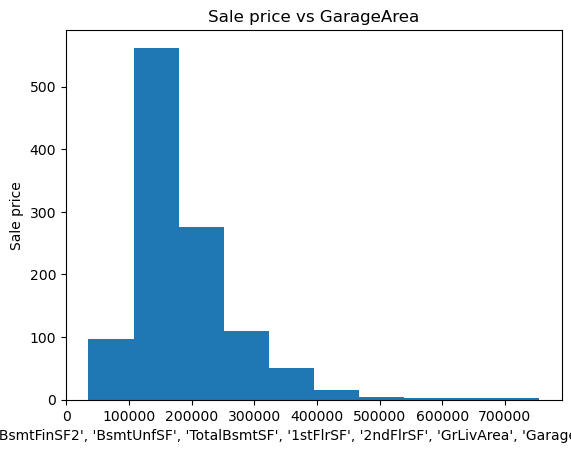

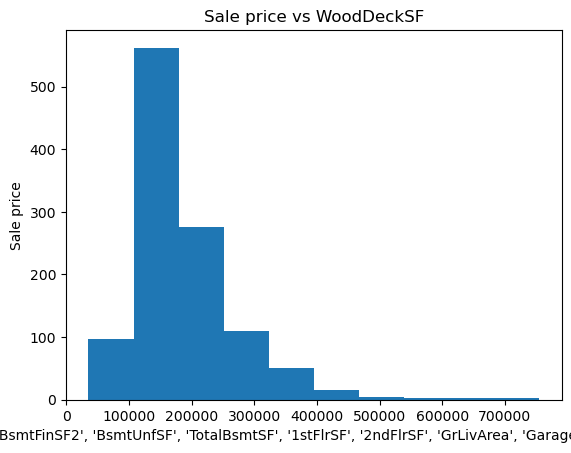

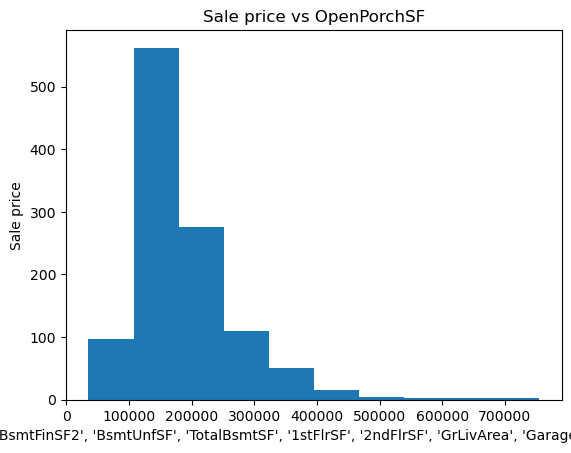

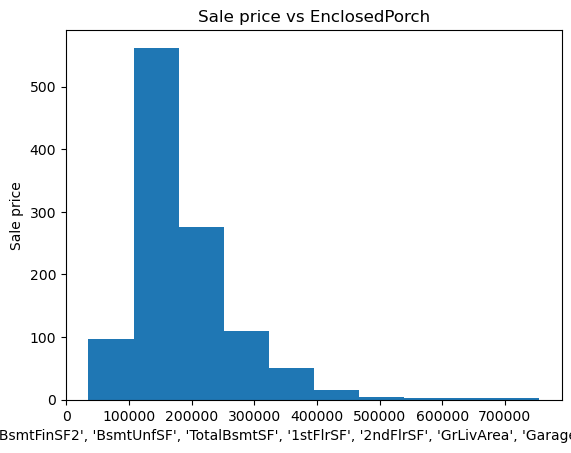

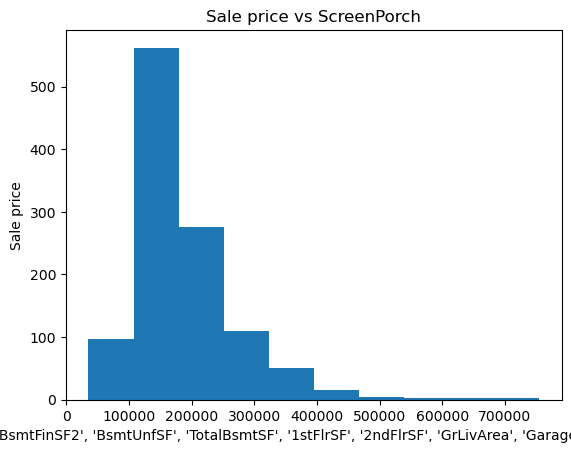

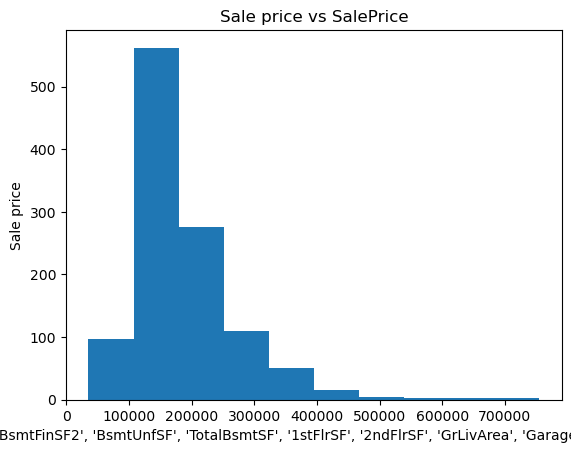

In [34]:
data = df.copy()
for continuous_feature in continuous_features:
    data.groupby(continuous_features)['SalePrice'].median().plot(kind='hist')
    plt.xlabel(continuous_features)
    plt.ylabel("Sale price")
    plt.title("Sale price vs"+" " +continuous_feature)
    plt.show()

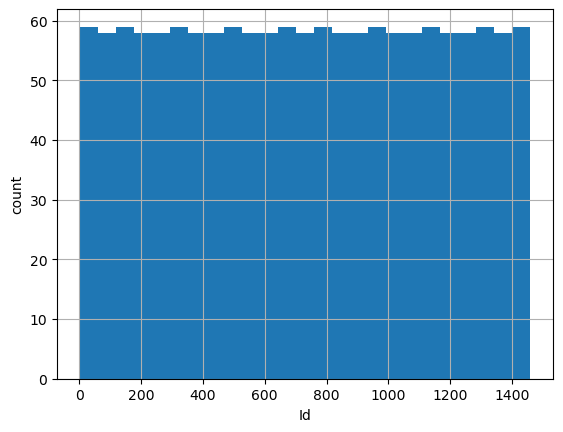

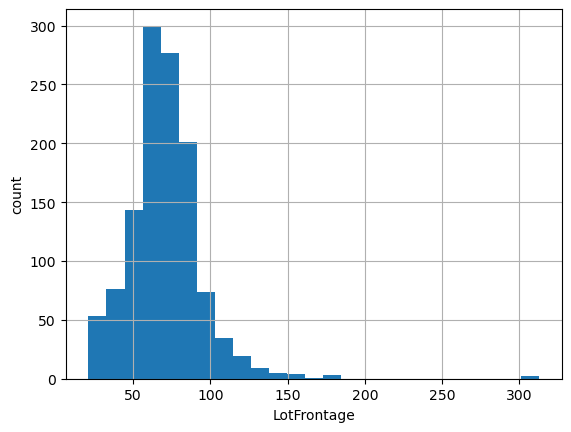

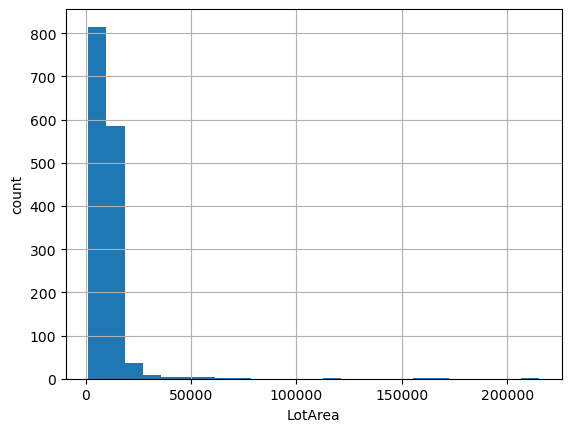

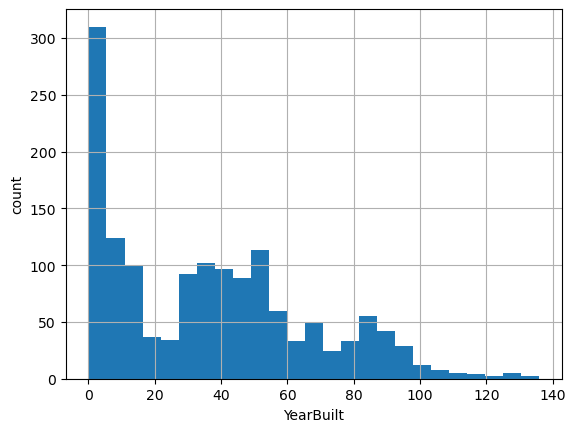

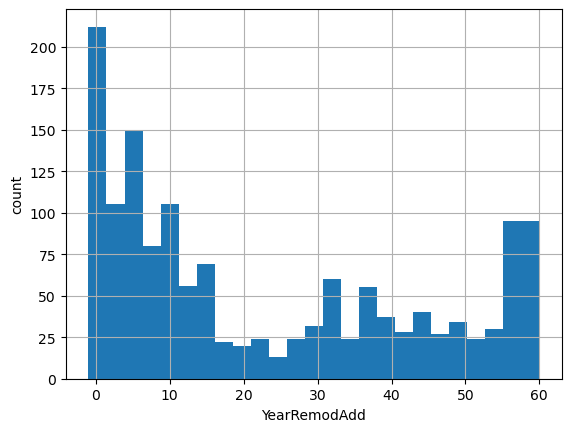

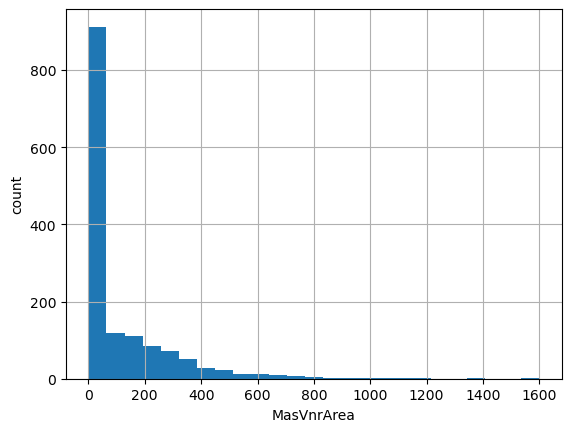

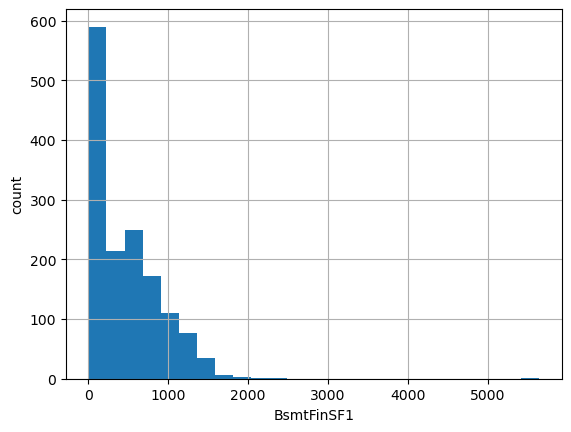

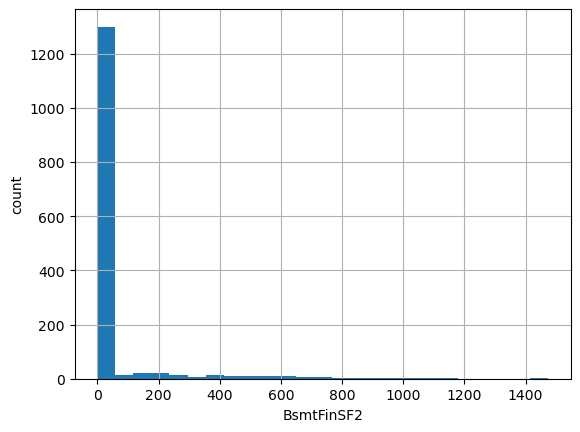

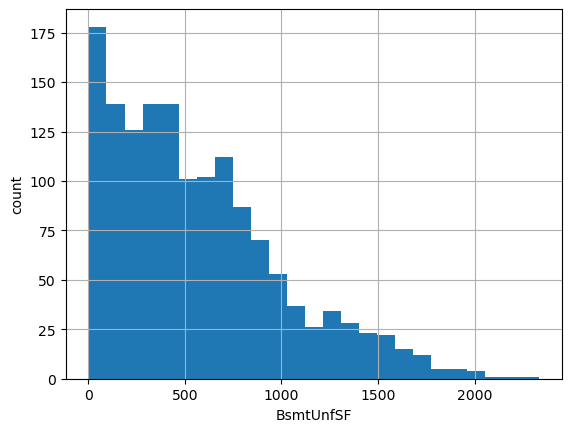

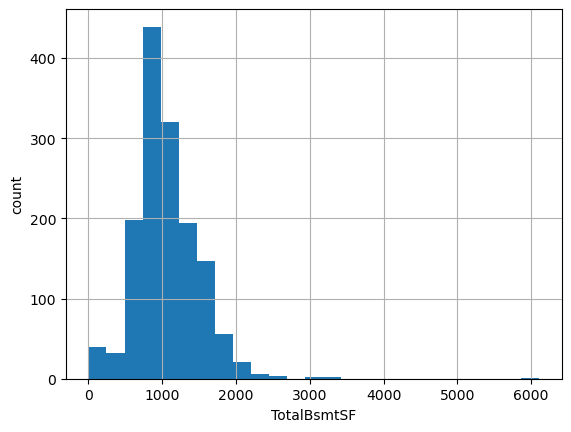

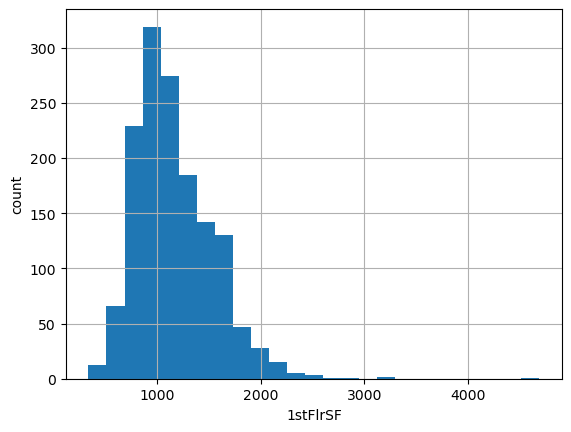

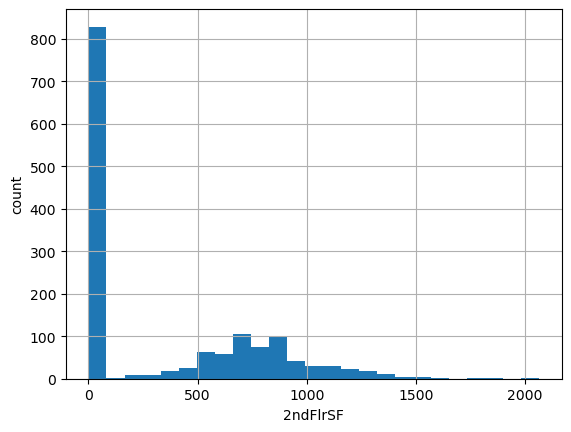

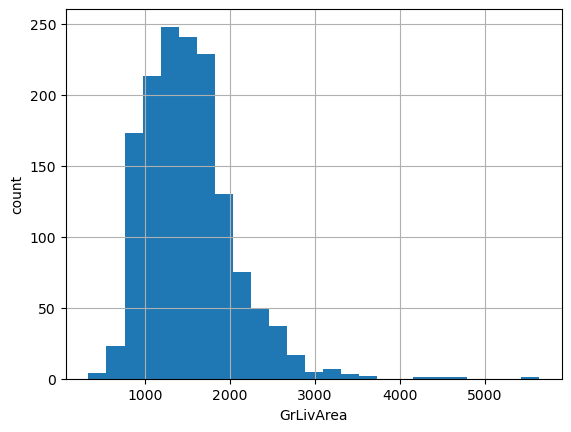

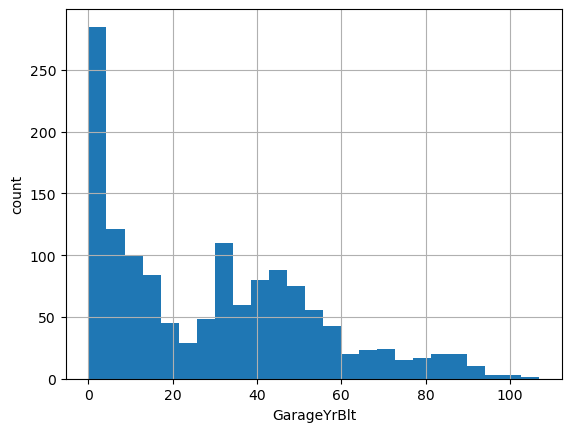

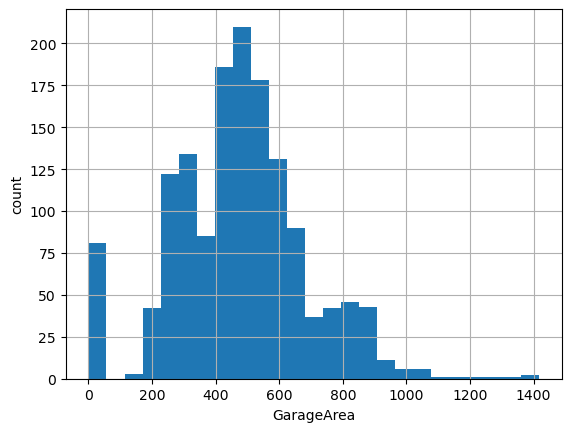

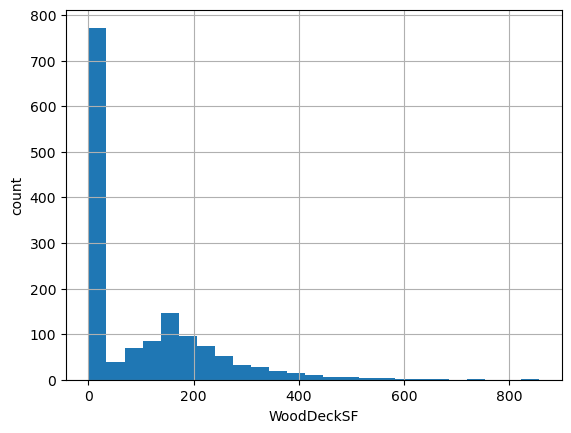

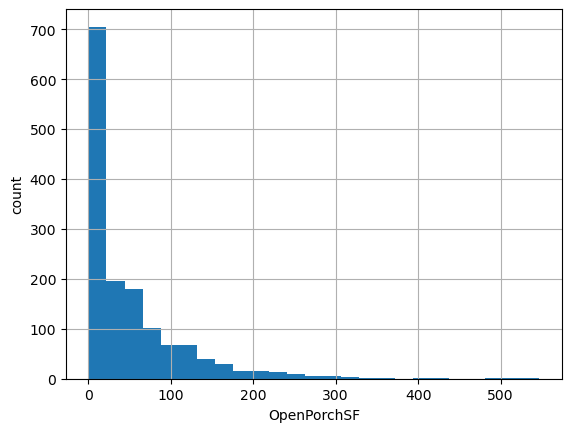

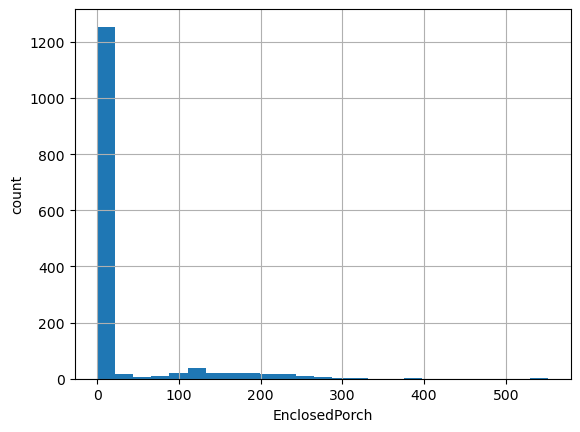

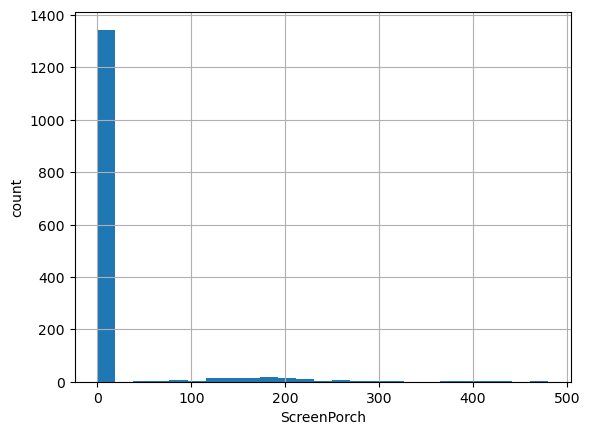

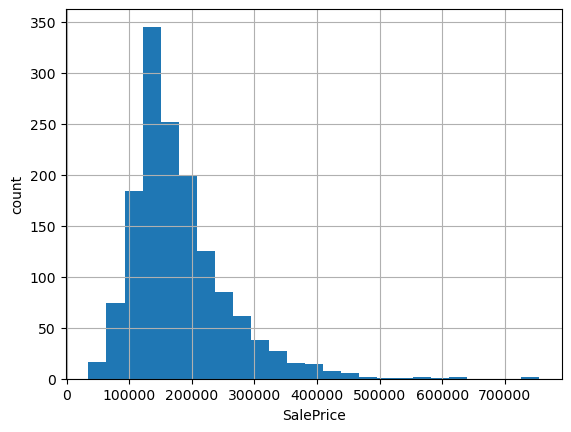

In [35]:
data = df.copy()
for feature in continuous_features:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

# Outliers

In [37]:
import plotly.express as px

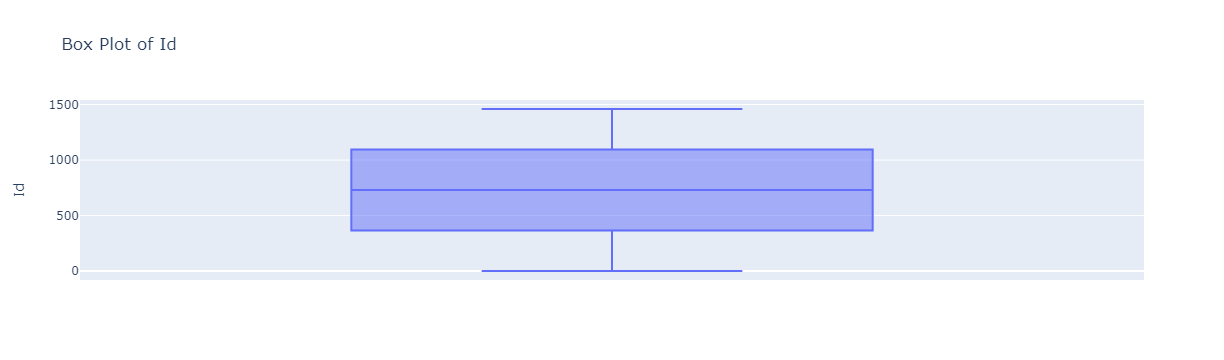

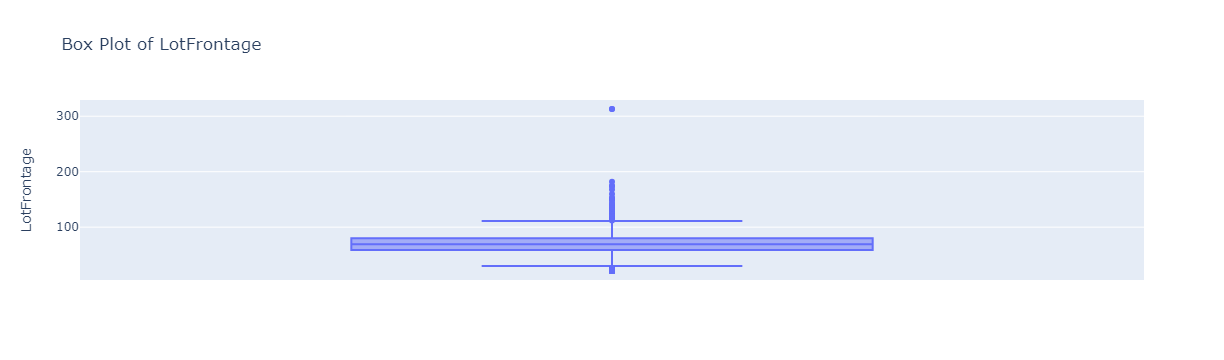

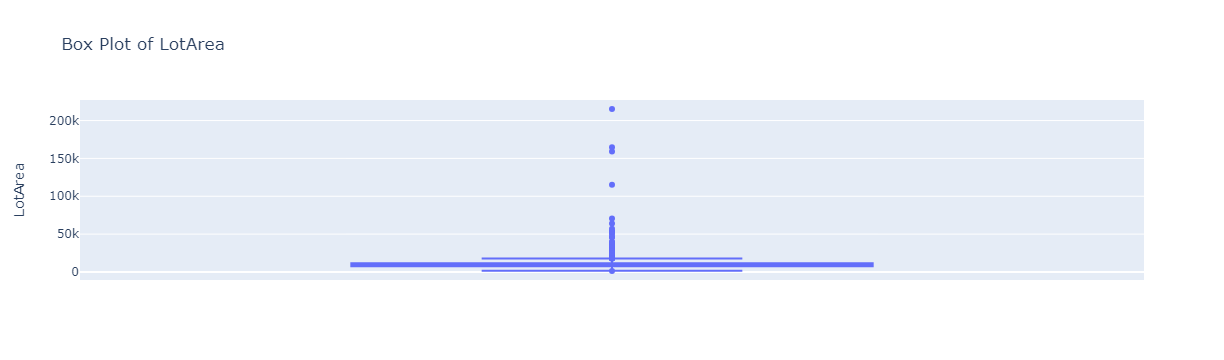

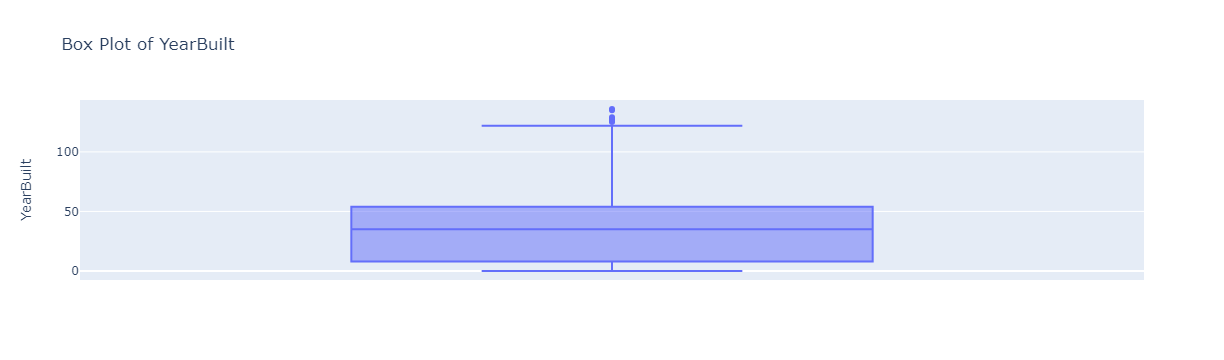

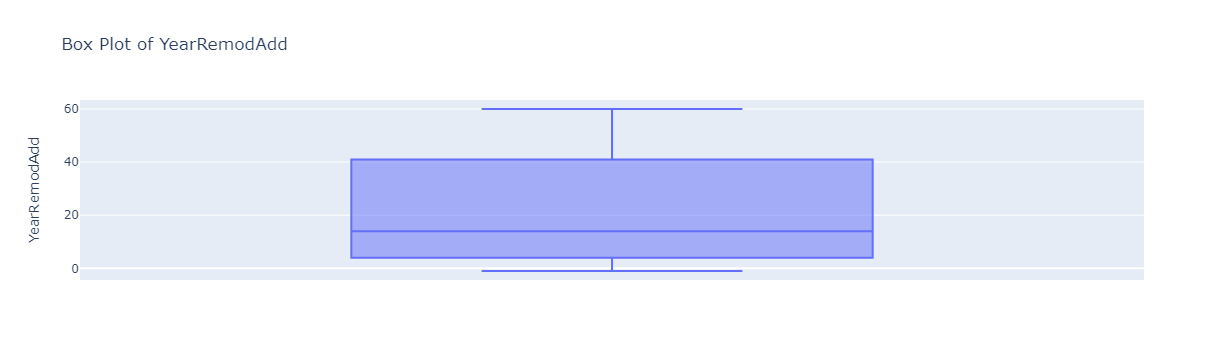

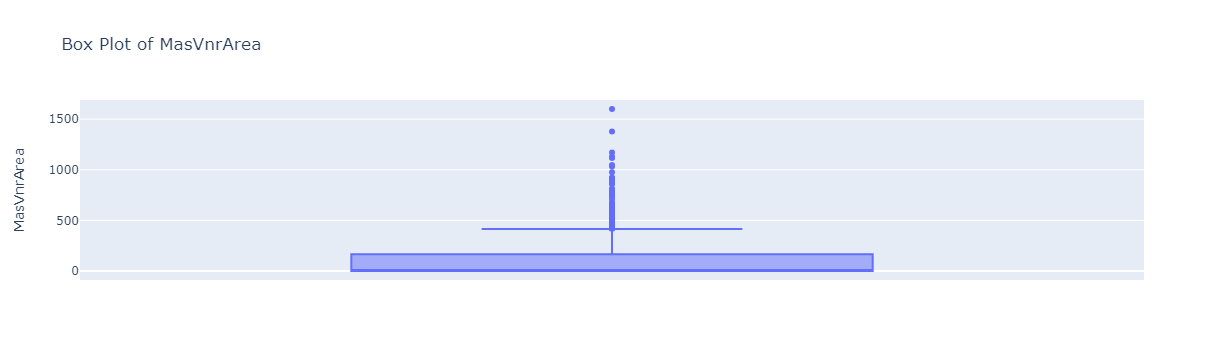

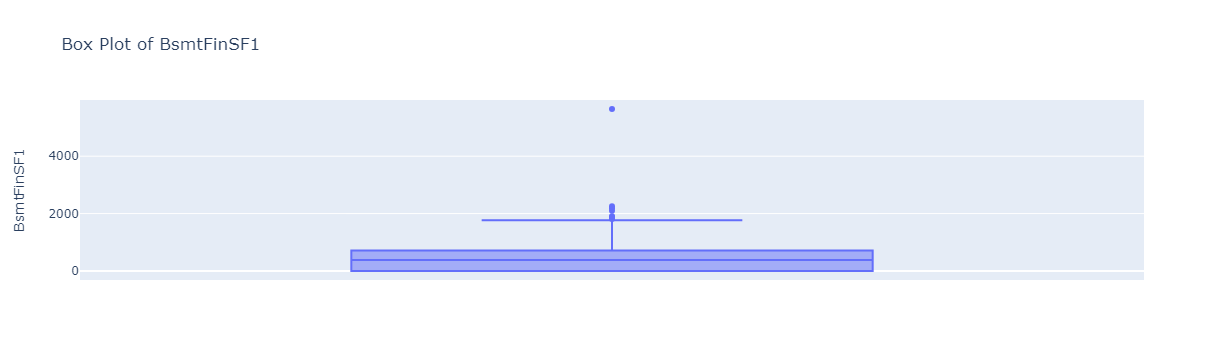

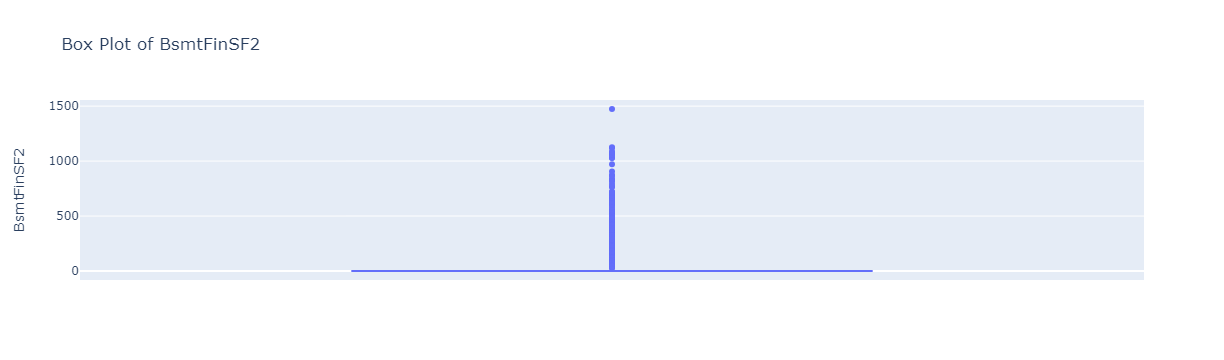

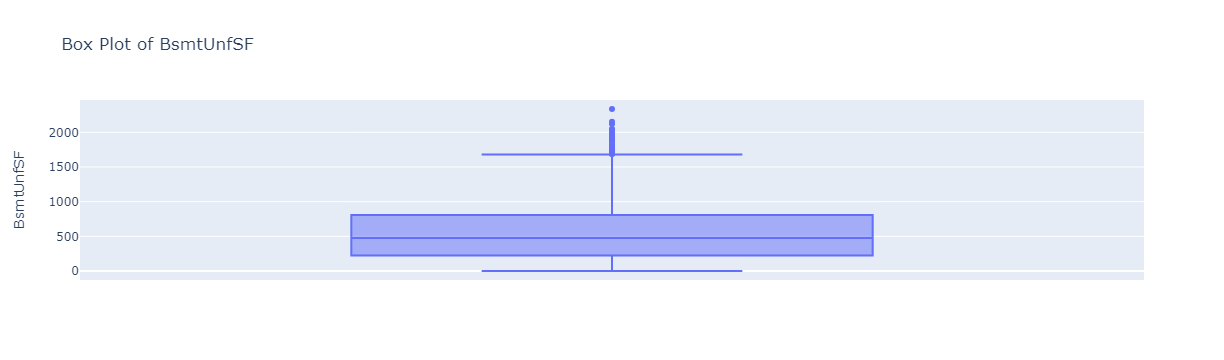

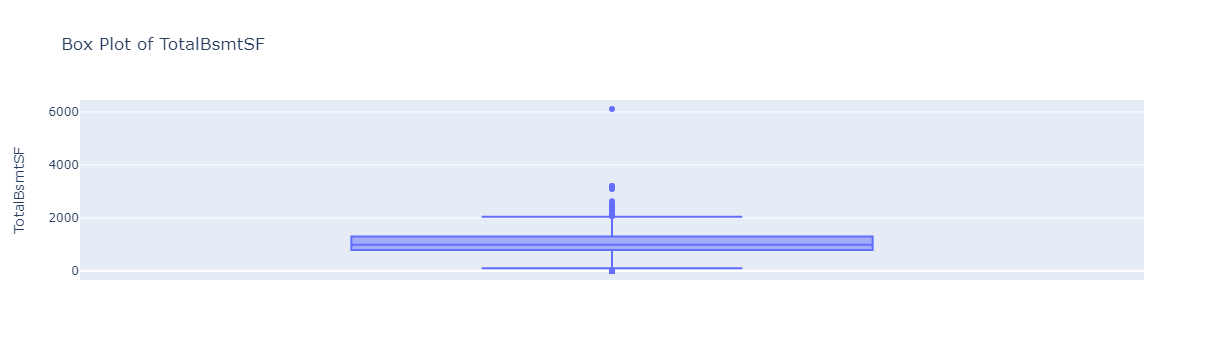

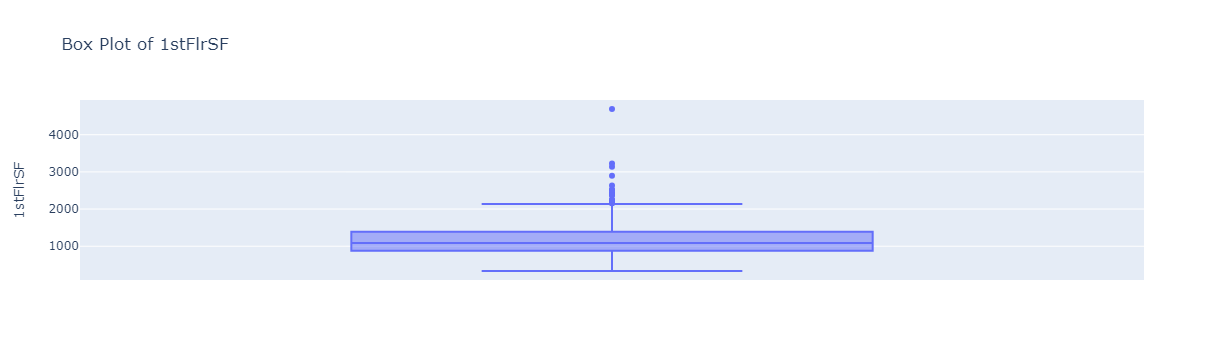

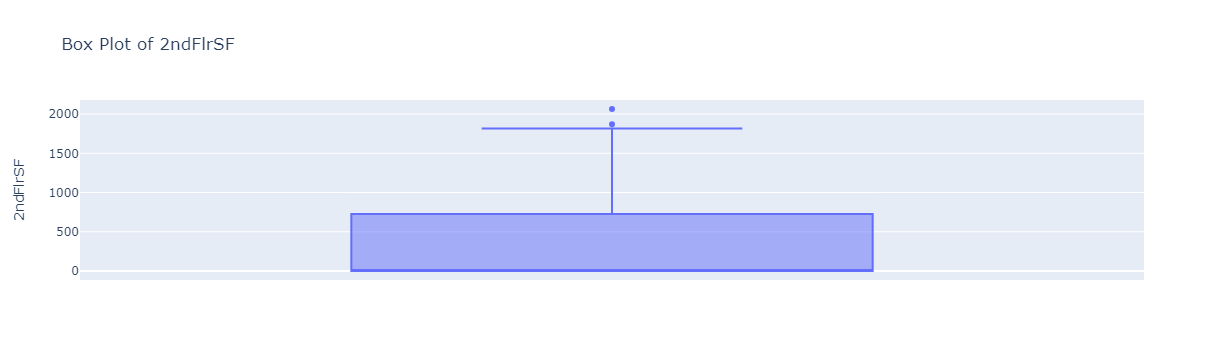

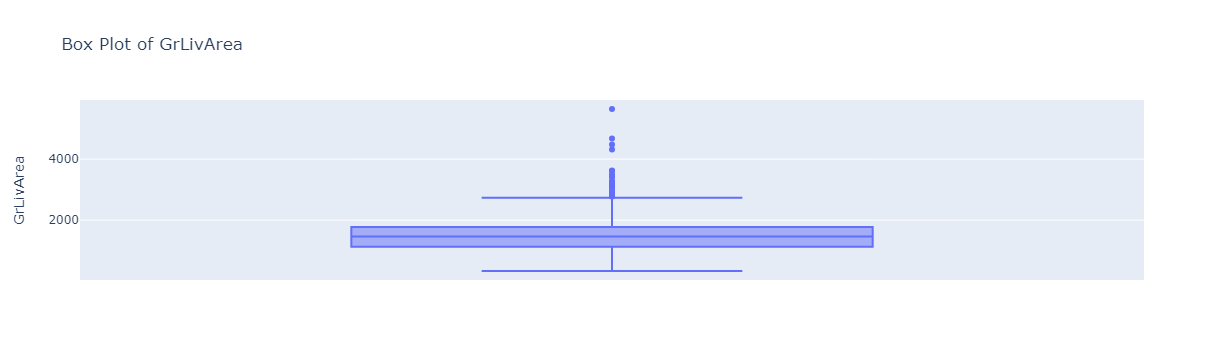

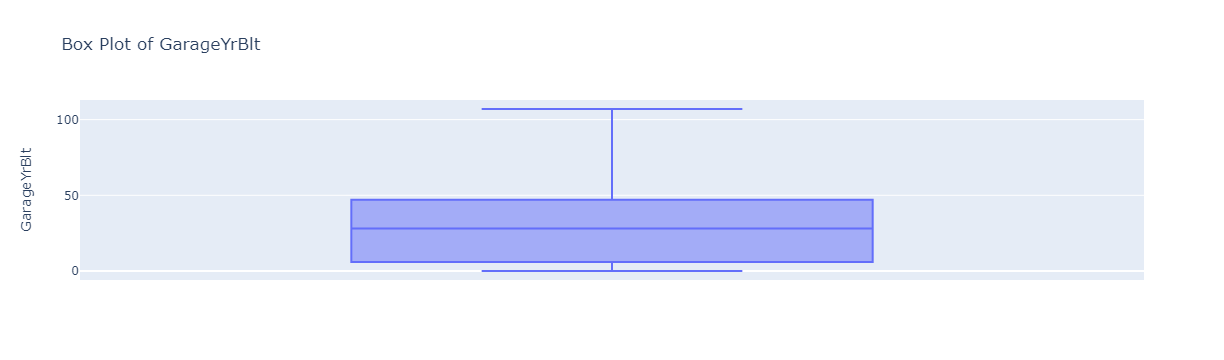

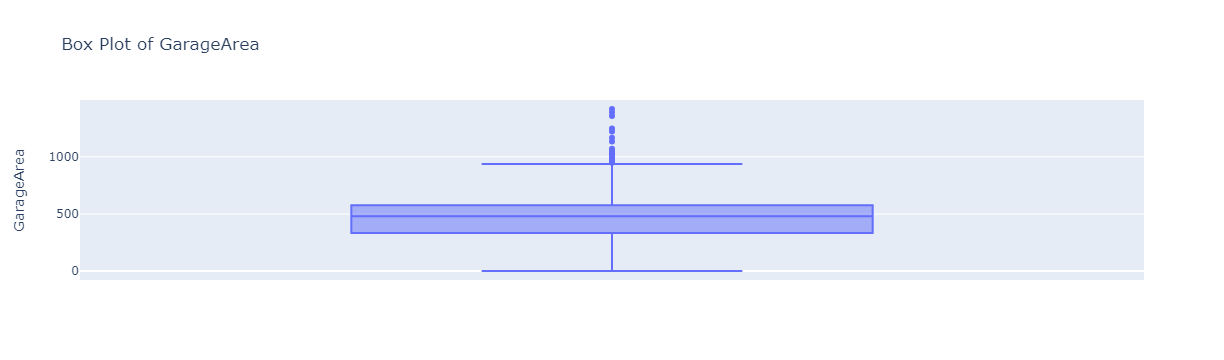

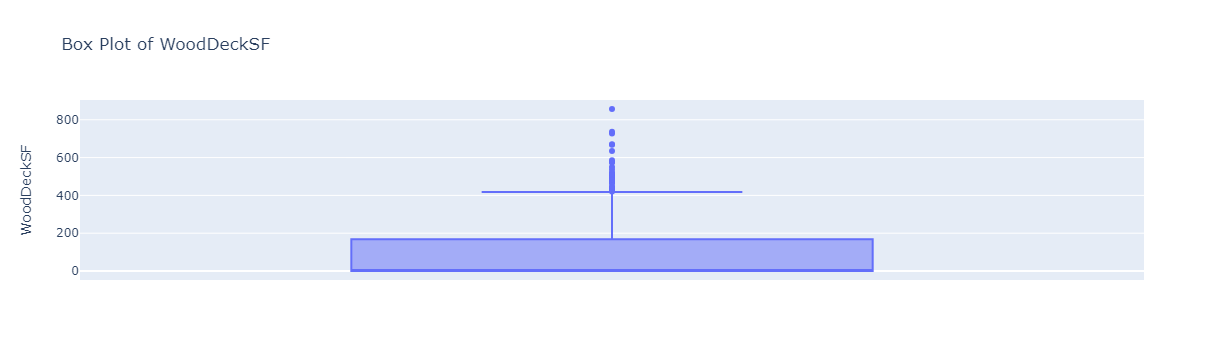

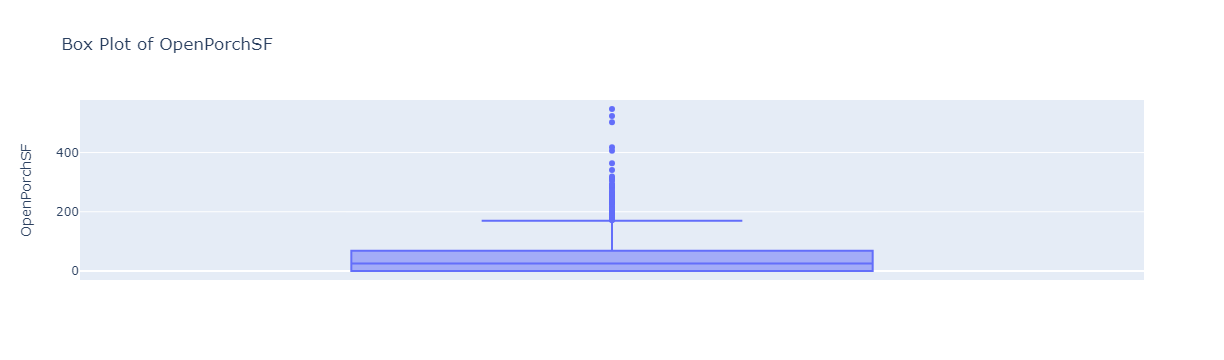

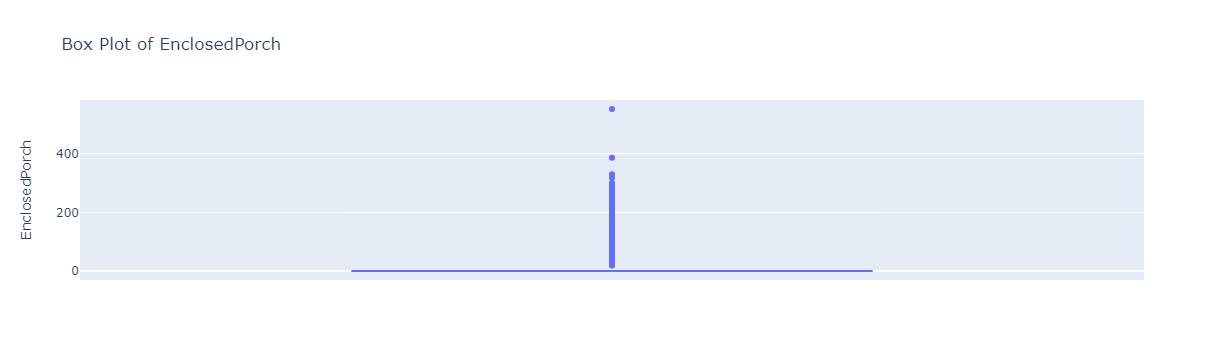

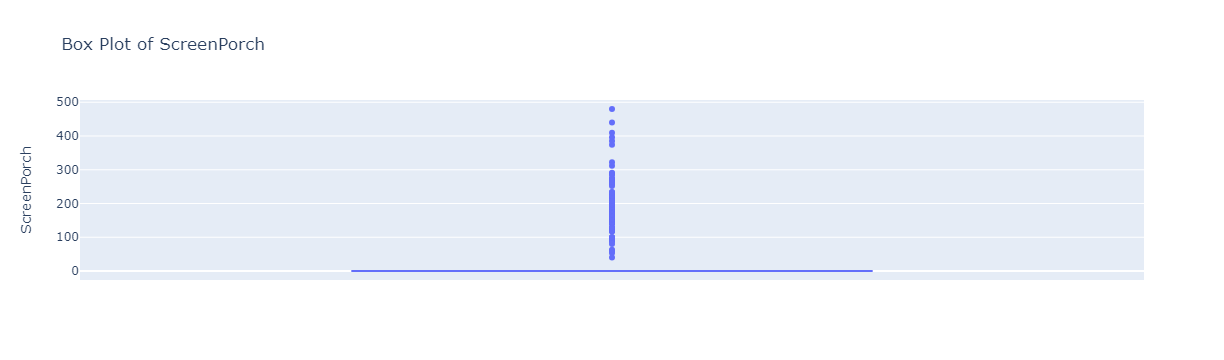

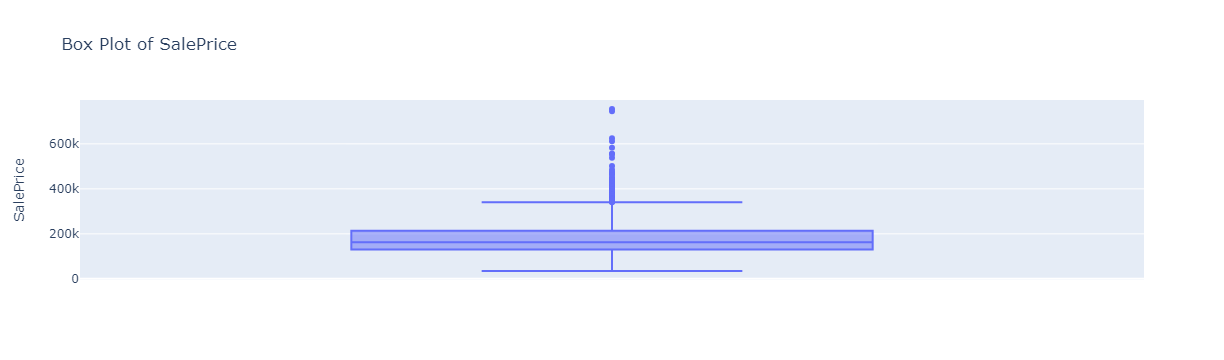

In [38]:
import plotly.express as px

for feature in continuous_features:
    fig = px.box(data, y=feature, title=f'Box Plot of {feature}')
    fig.show()


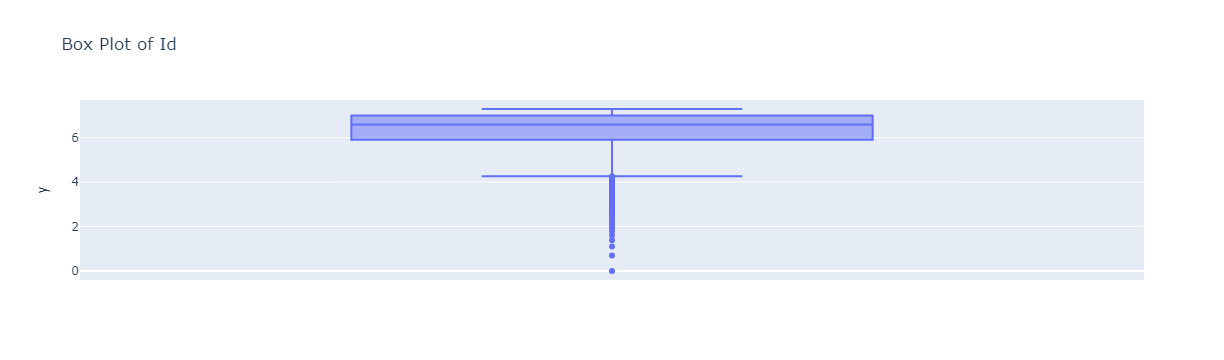

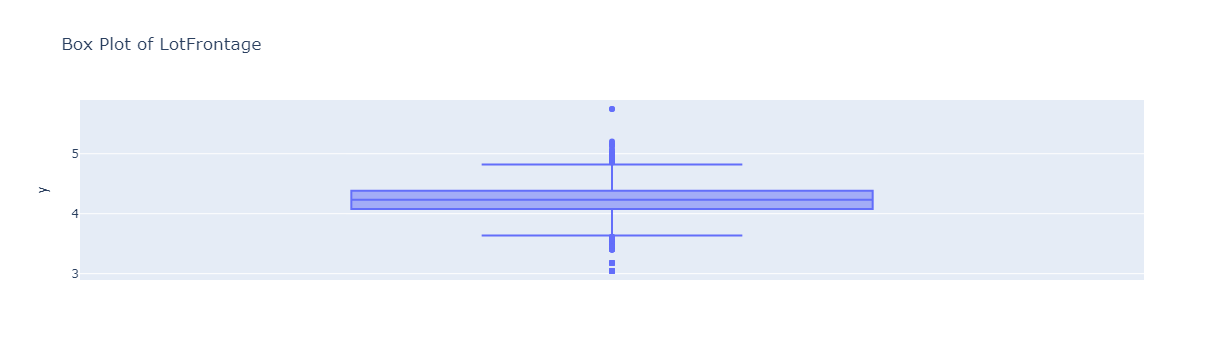

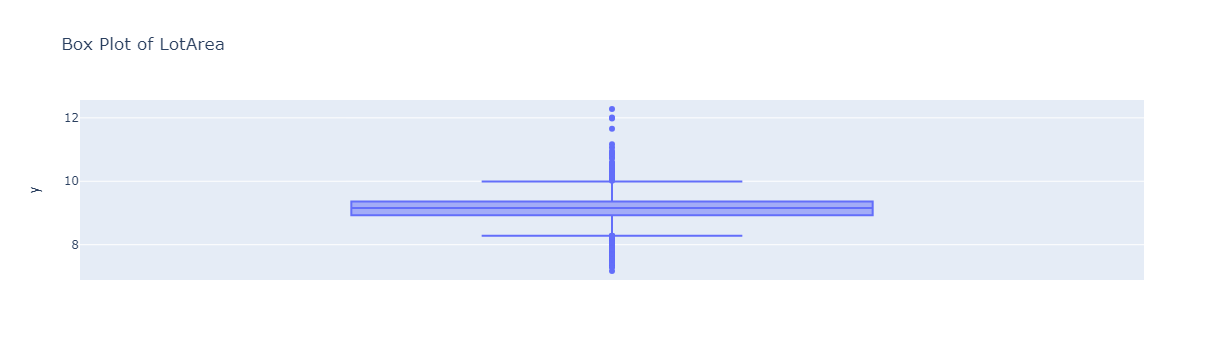

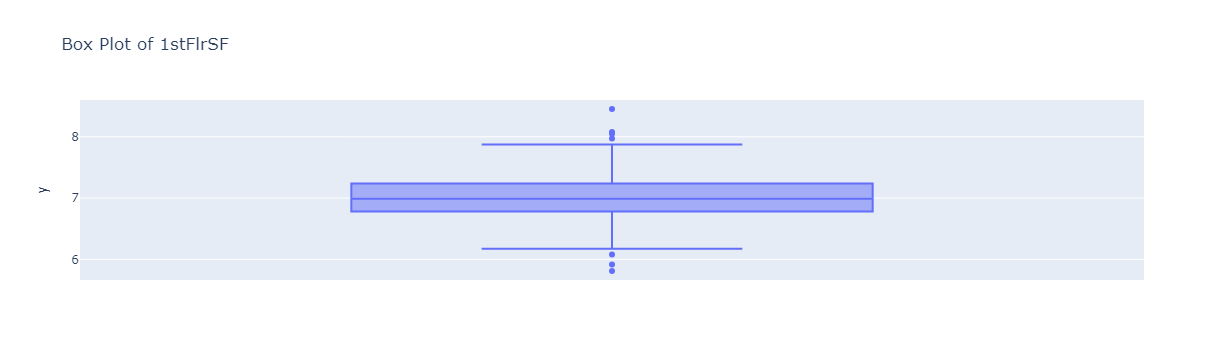

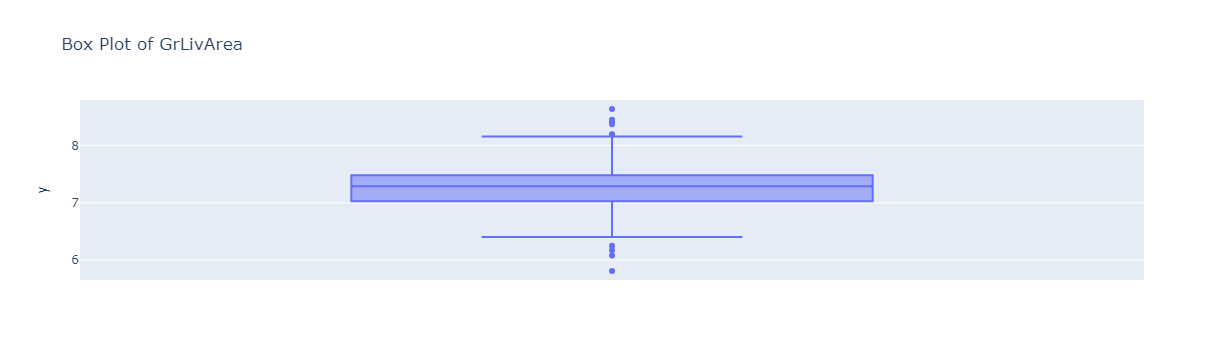

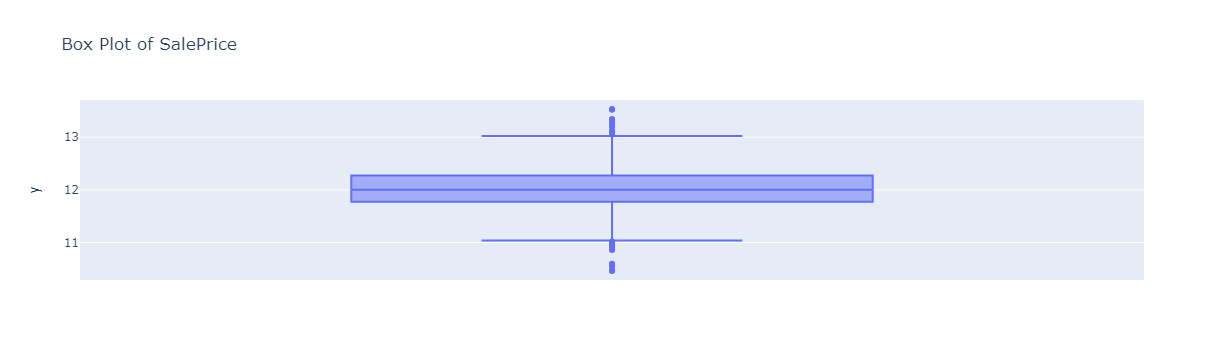

In [39]:
import plotly.express as px

for feature in continuous_features:
    if (0 in data[feature].unique()):
        pass
    else:
        fig = px.box(data, y=np.log(data[feature]), title=f'Box Plot of {feature}')
        fig.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='SalePrice', ylabel='Count'>

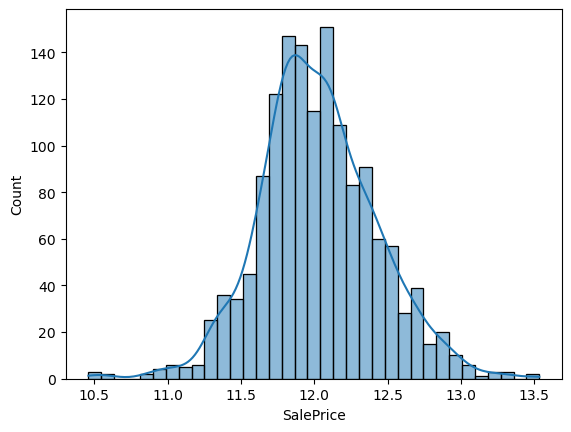

In [40]:
sns.histplot(np.log(data['SalePrice']),kde=True)

# Categorical

In [42]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes=='O']

In [43]:
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [44]:
len(df['BsmtQual'].unique())

5

In [45]:
for feature in categorical_feature:
    print(f"the number of categories in {feature} is equal to {len(df[feature].unique())}")
    # for feature in categorical_feature:
    #print("The number of categories in {} is equal to {}".format(feature, len(df[feature].unique())))

the number of categories in MSZoning is equal to 5
the number of categories in Street is equal to 2
the number of categories in Alley is equal to 3
the number of categories in LotShape is equal to 4
the number of categories in LandContour is equal to 4
the number of categories in Utilities is equal to 2
the number of categories in LotConfig is equal to 5
the number of categories in LandSlope is equal to 3
the number of categories in Neighborhood is equal to 25
the number of categories in Condition1 is equal to 9
the number of categories in Condition2 is equal to 8
the number of categories in BldgType is equal to 5
the number of categories in HouseStyle is equal to 8
the number of categories in RoofStyle is equal to 6
the number of categories in RoofMatl is equal to 8
the number of categories in Exterior1st is equal to 15
the number of categories in Exterior2nd is equal to 16
the number of categories in MasVnrType is equal to 4
the number of categories in ExterQual is equal to 4
the num

In [46]:
data=df.copy()

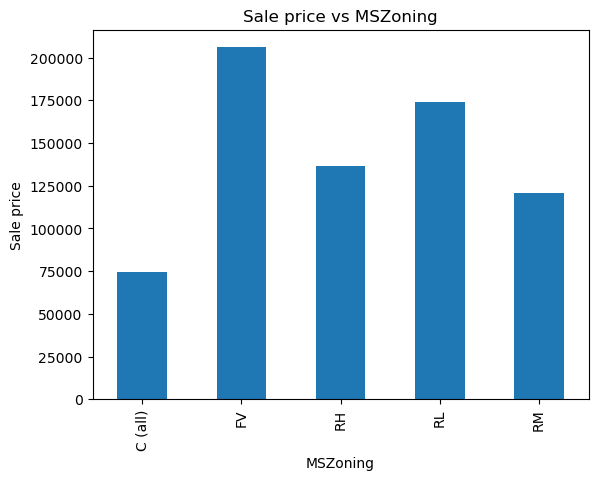

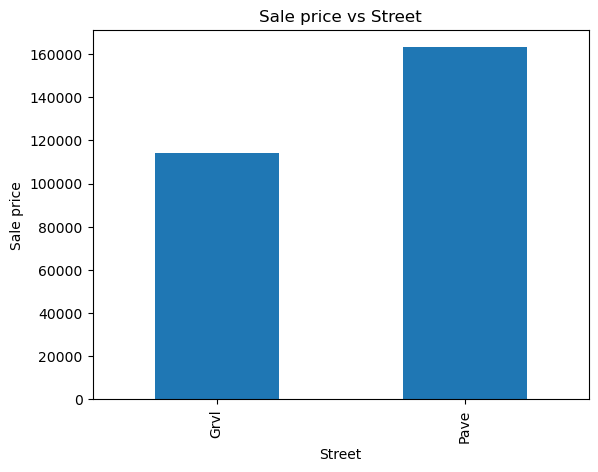

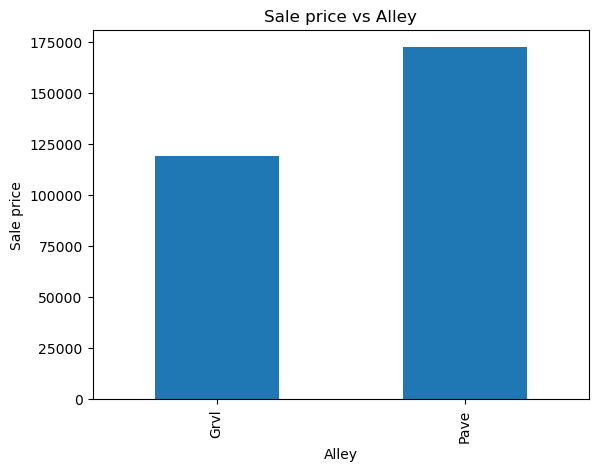

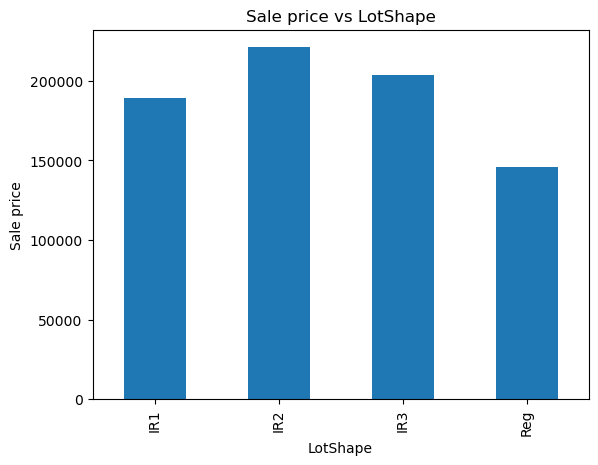

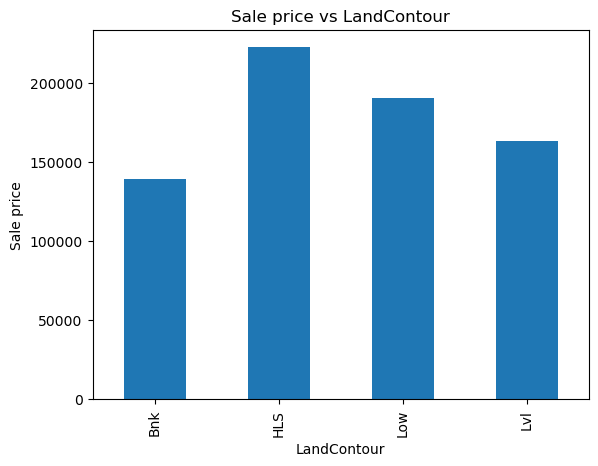

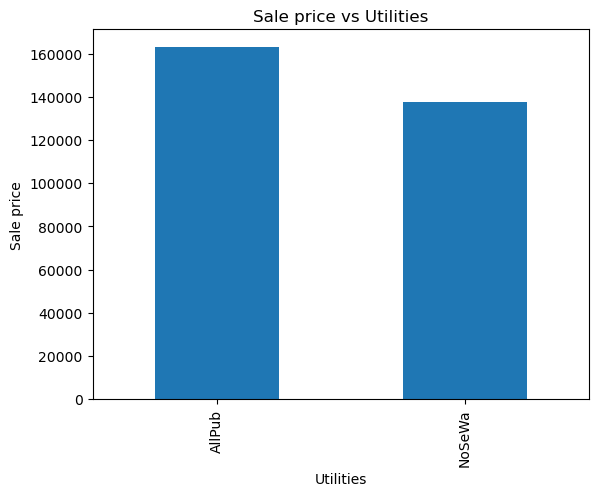

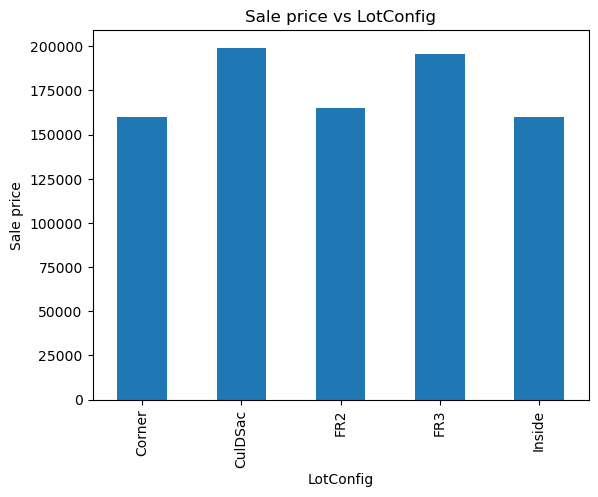

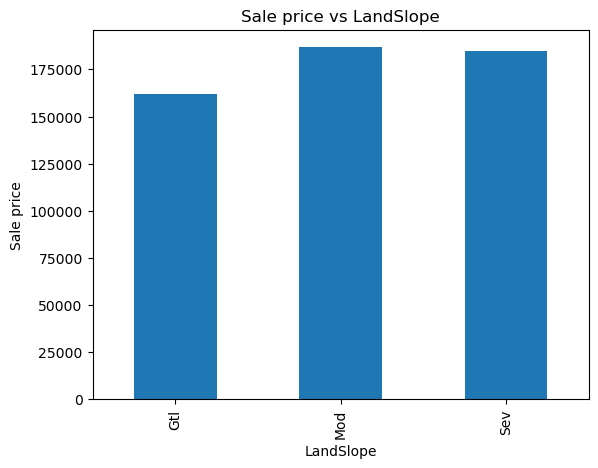

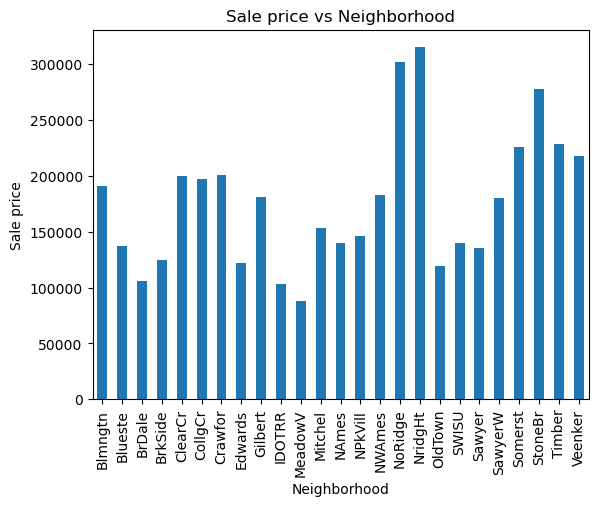

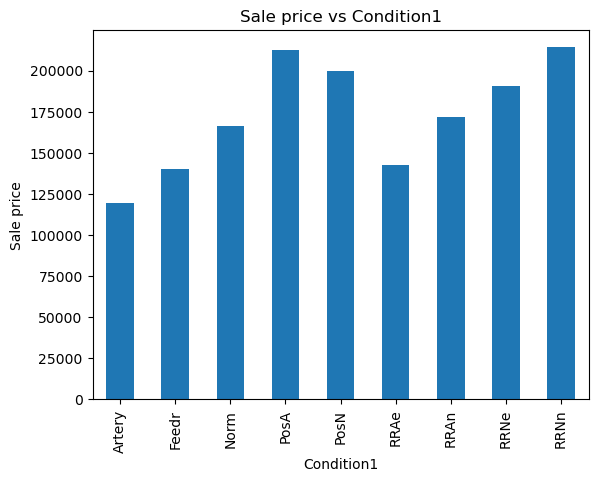

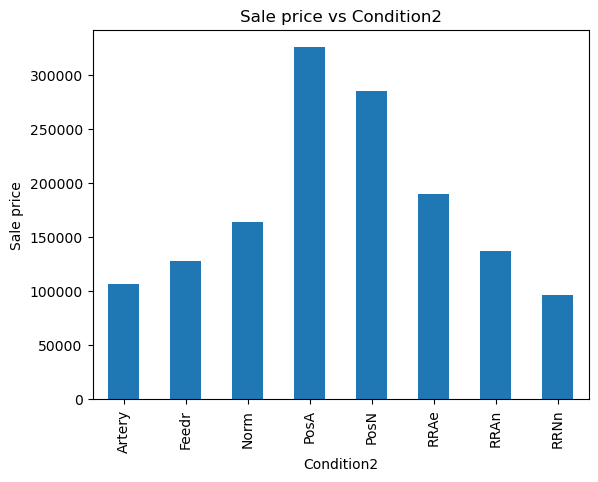

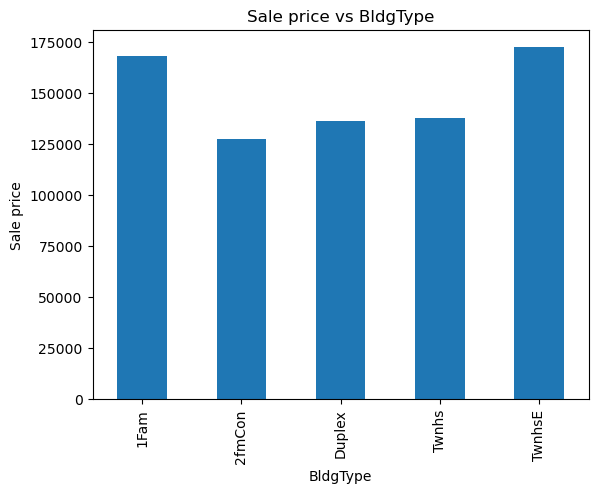

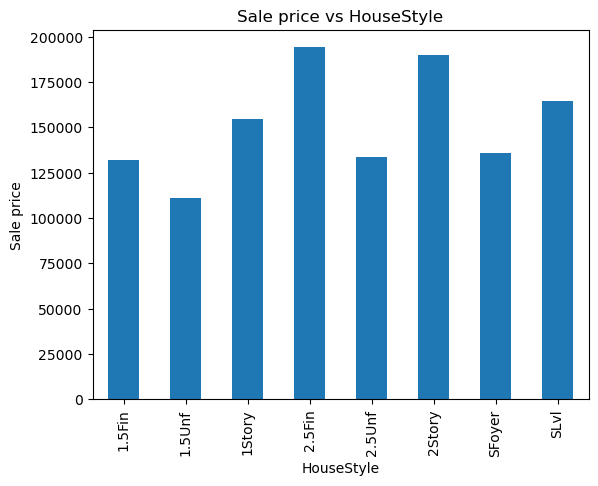

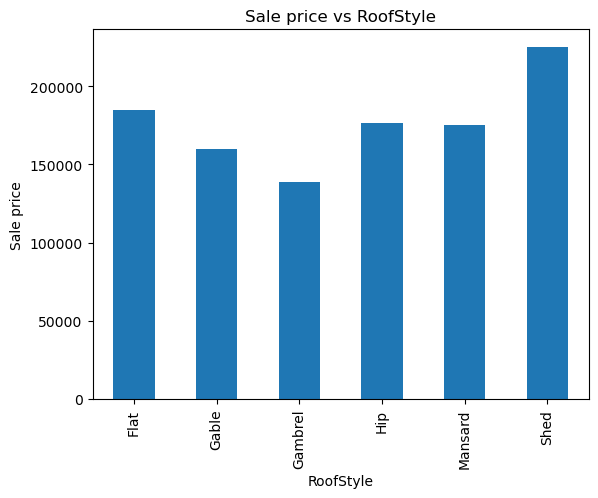

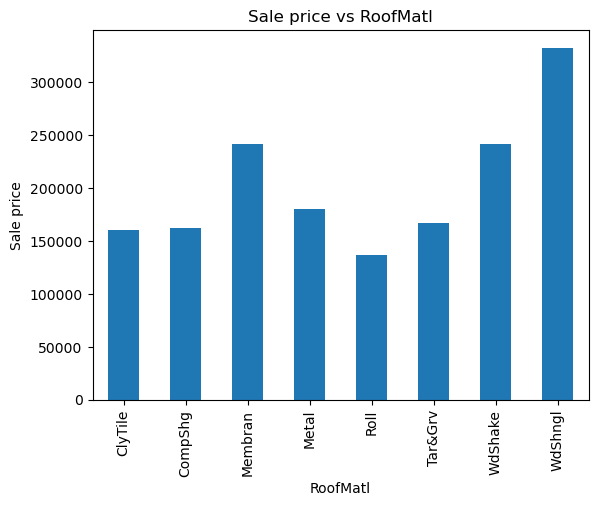

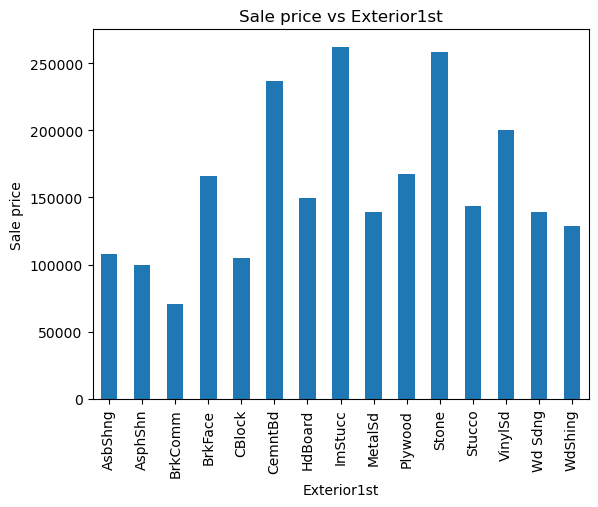

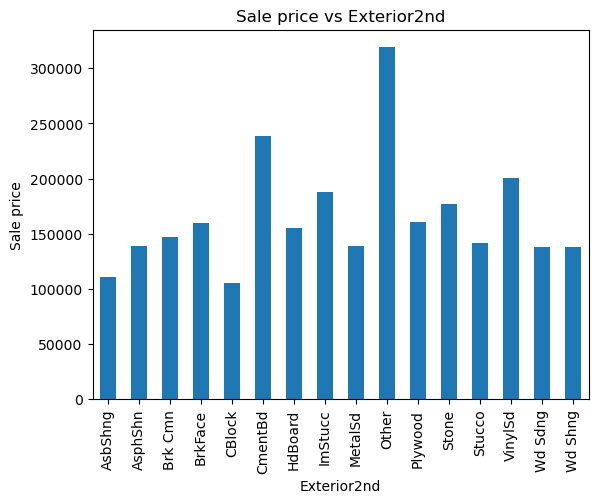

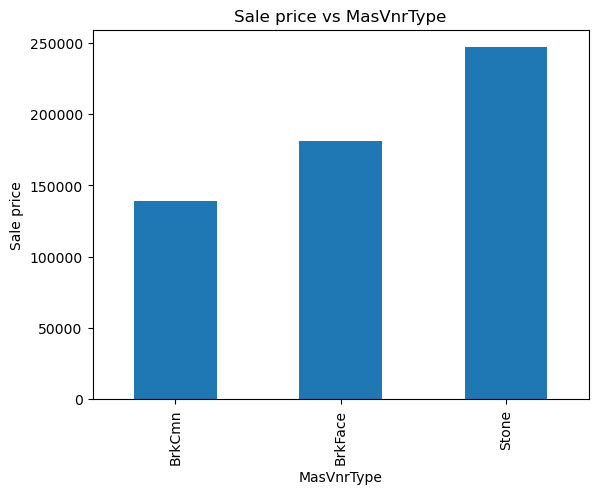

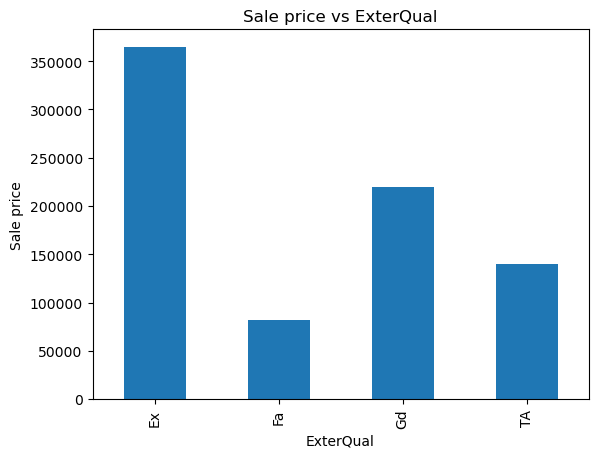

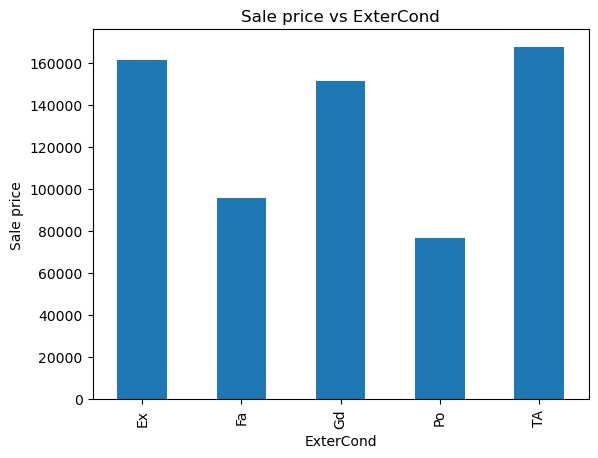

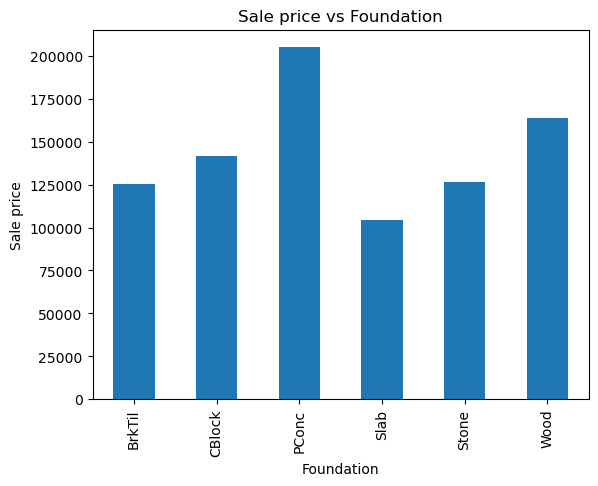

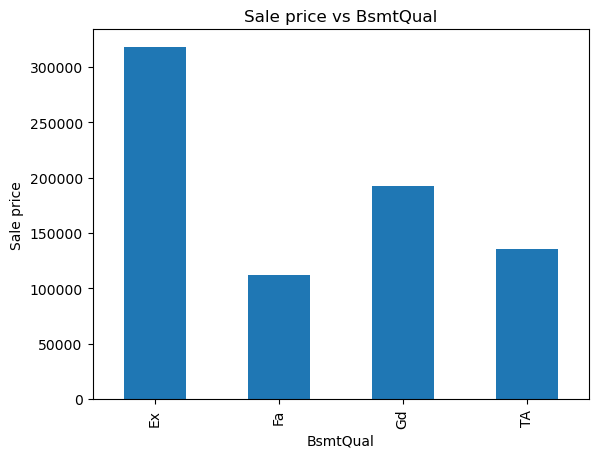

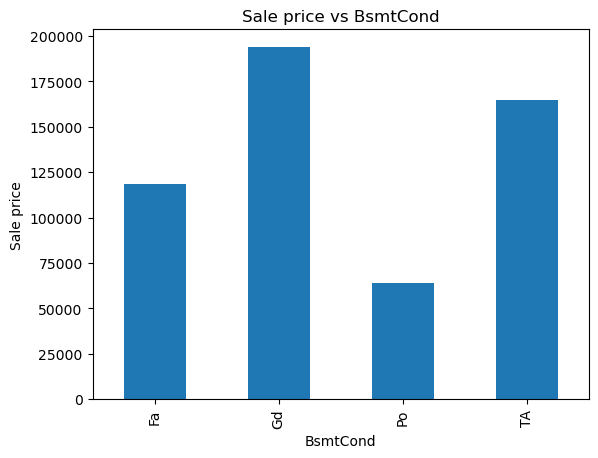

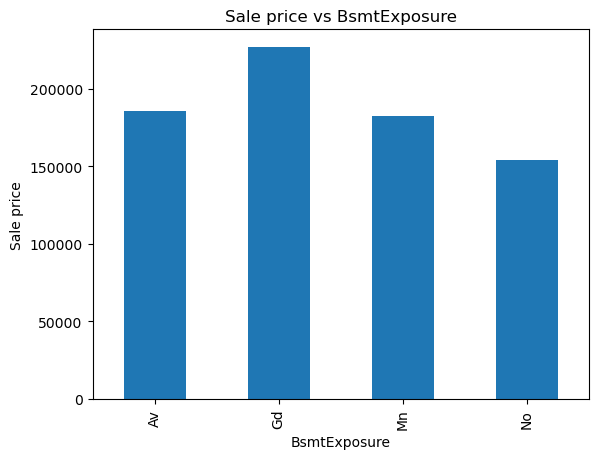

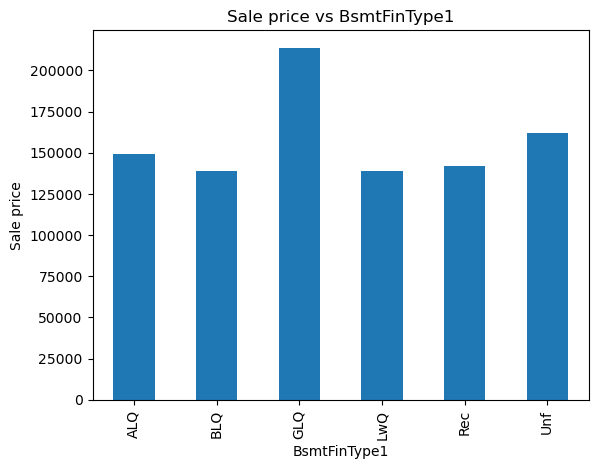

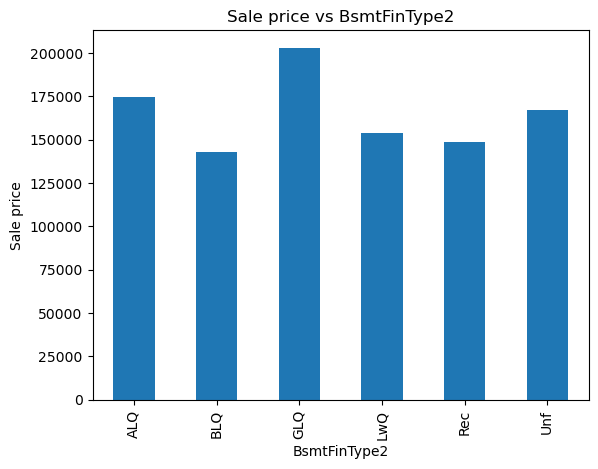

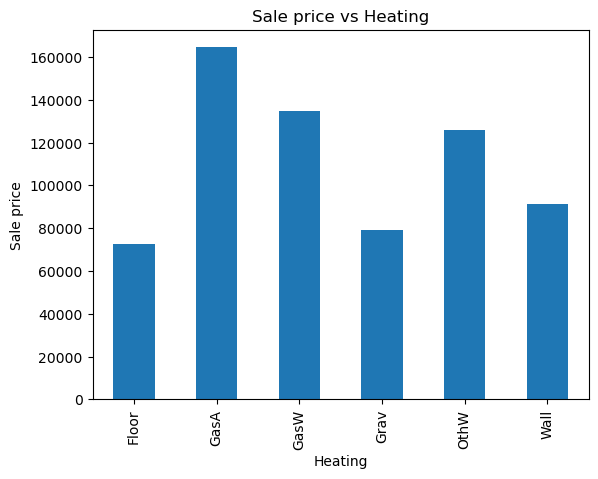

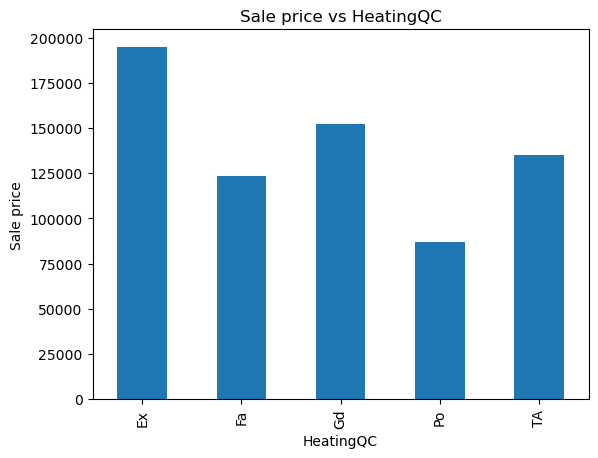

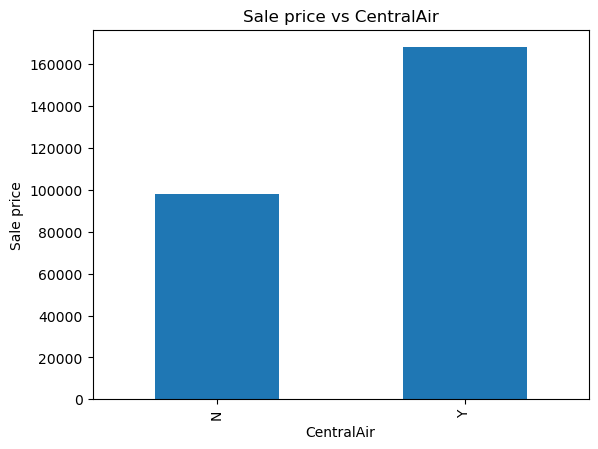

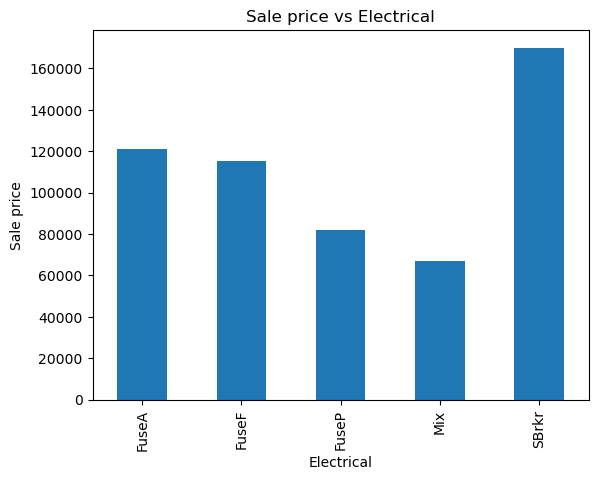

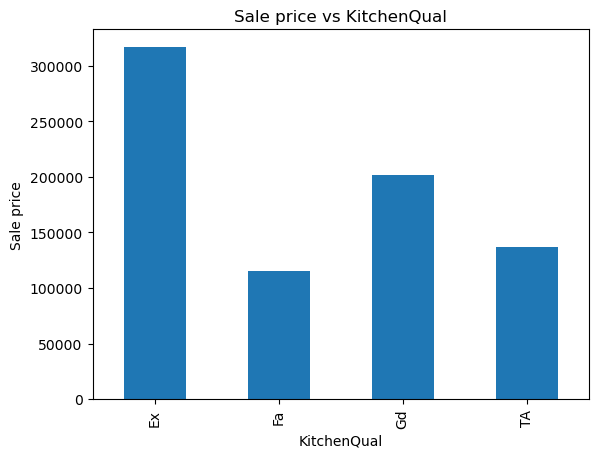

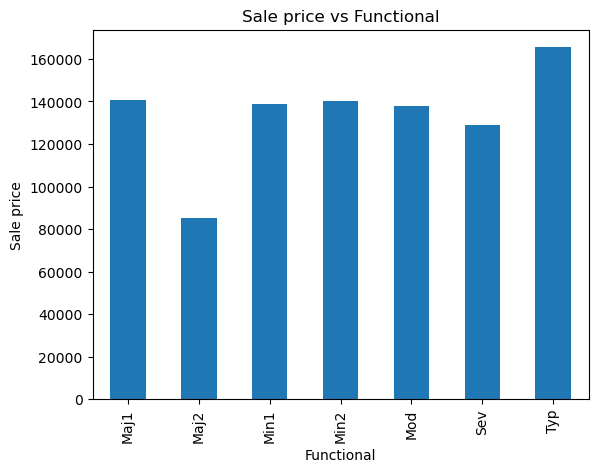

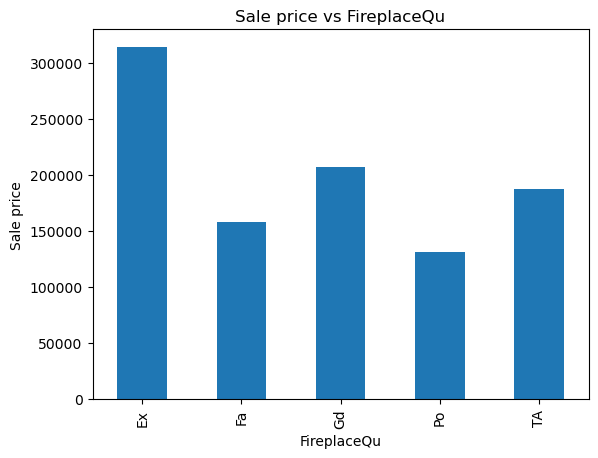

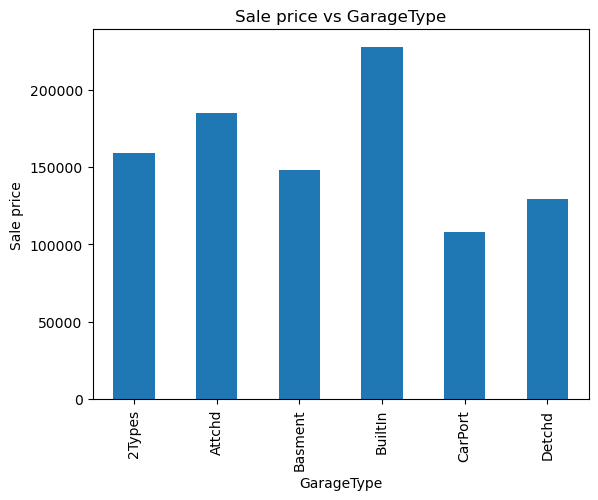

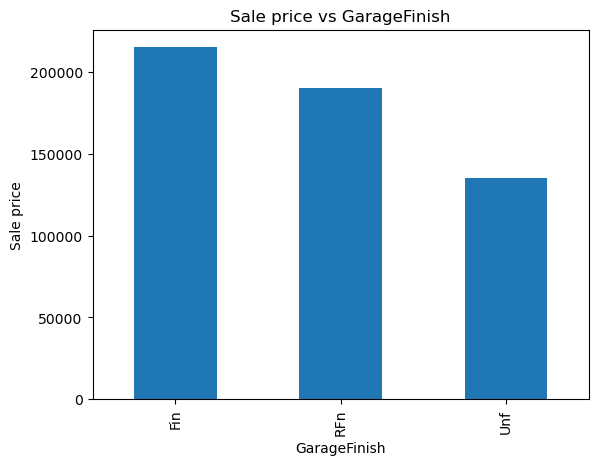

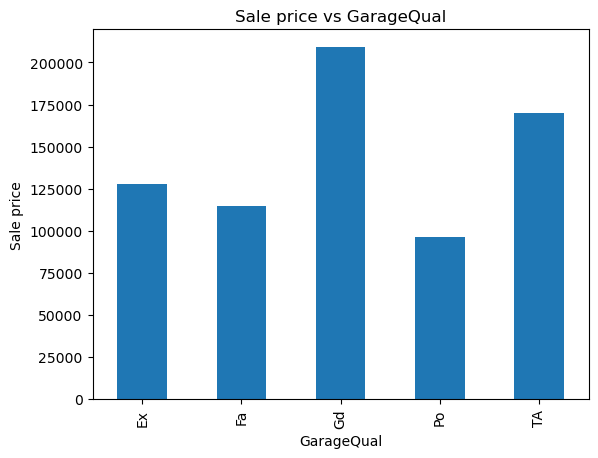

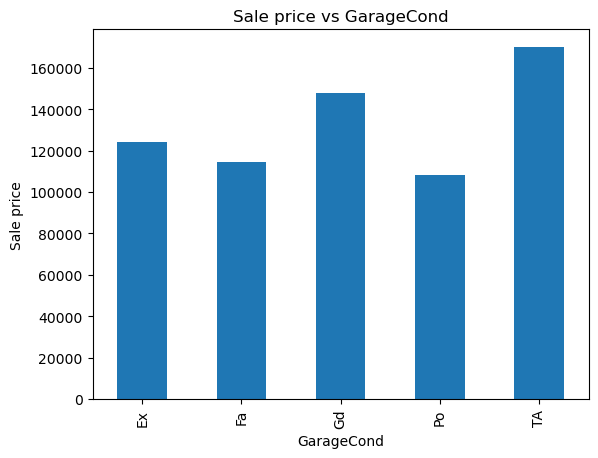

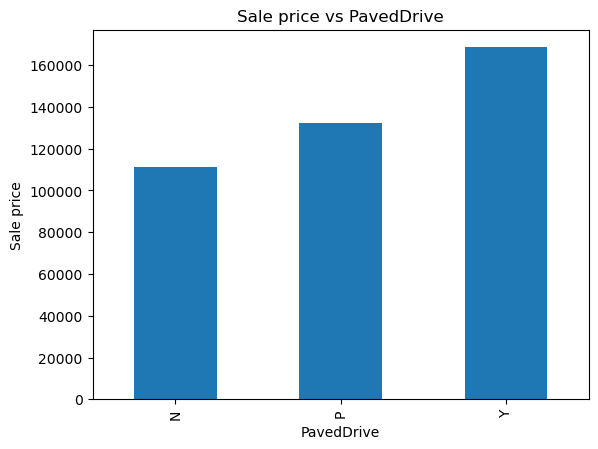

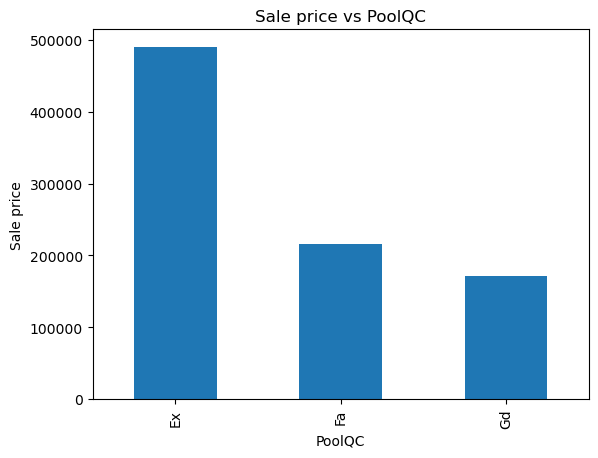

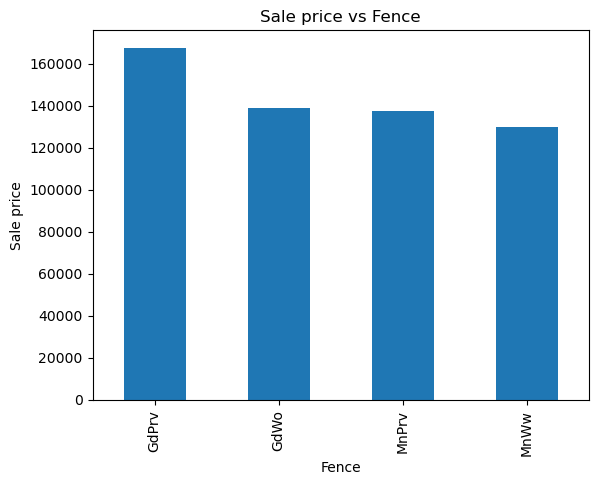

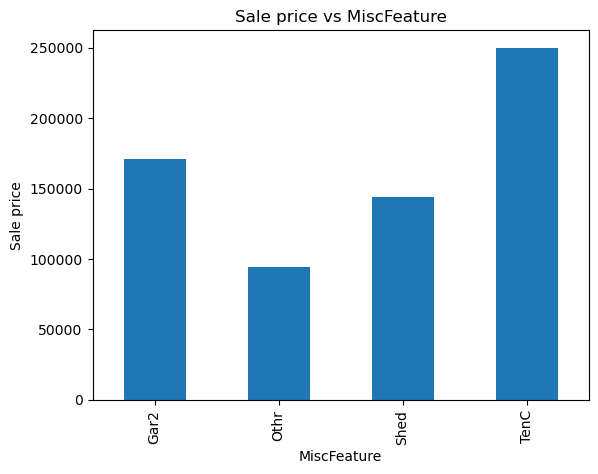

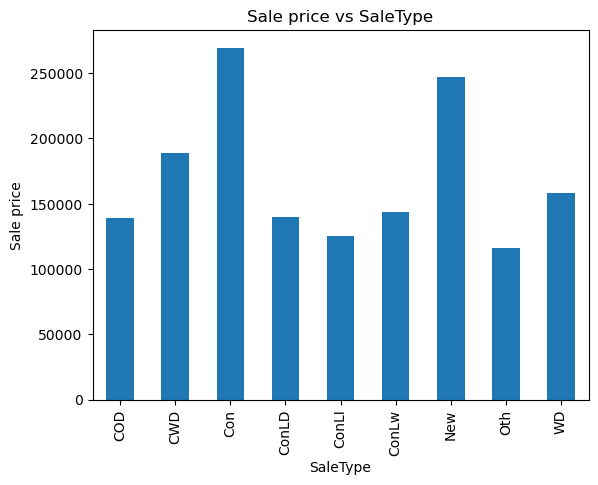

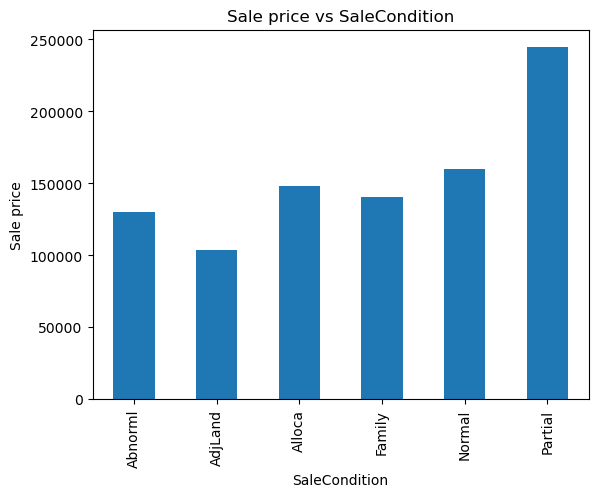

In [47]:
for feature in categorical_feature:
    a=data.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Sale price')
    plt.title('Sale price vs'+" "+feature)
    plt.show()

In [48]:
data.groupby(feature)['SalePrice'].median()

SaleCondition
Abnorml    130000.0
AdjLand    104000.0
Alloca     148145.0
Family     140500.0
Normal     160000.0
Partial    244600.0
Name: SalePrice, dtype: float64

In [1]:
pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('train.csv')
profile = ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()
profile.to_file("report.html")

SyntaxError: invalid syntax (1759998289.py, line 1)